# Проект - Прогнозирование оттока клиентов в сети отелей «Как в гостях»

- **Заказчик этого исследования — сеть отелей «Как в гостях».**
- Чтобы привлечь клиентов, эта сеть отелей добавила на свой сайт возможность забронировать номер без предоплаты. Однако если клиент отменял бронирование, то компания терпела убытки. Сотрудники отеля могли, например, закупить продукты к приезду гостя или просто не успеть найти другого клиента.
- Чтобы решить эту проблему, вам нужно разработать систему, которая предсказывает отказ от брони. Если модель покажет, что бронь будет отменена, то клиенту предлагается внести депозит. Размер депозита — 80% от стоимости номера за одни сутки и затрат на разовую уборку. Деньги будут списаны со счёта клиента, если он всё же отменит бронь.

**Бизнес-метрика и другие данные**
- Основная бизнес-метрика для любой сети отелей — её прибыль. Прибыль отеля — это разница между стоимостью номера за все ночи и затраты на обслуживание: как при подготовке номера, так и при проживании постояльца.
- В отеле есть несколько типов номеров. В зависимости от типа номера назначается стоимость за одну ночь. Есть также затраты на уборку. Если клиент снял номер надолго, то убираются каждые два дня.
- `Стоимость номеров отеля:`
- категория A: за ночь — 1 000, разовое обслуживание — 400;
- категория B: за ночь — 800, разовое обслуживание — 350;
- категория C: за ночь — 600, разовое обслуживание — 350;
- категория D: за ночь — 550, разовое обслуживание — 150;
- категория E: за ночь — 500, разовое обслуживание — 150;
- категория F: за ночь — 450, разовое обслуживание — 150;
- категория G: за ночь — 350, разовое обслуживание — 150.
- В ценовой политике отеля используются сезонные коэффициенты: весной и осенью цены повышаются на 20%, летом — на 40%. Убытки отеля в случае отмены брони номера — это стоимость одной уборки и одной ночи с учётом сезонного коэффициента.На разработку системы прогнозирования заложен бюджет — 400 000. При этом необходимо учесть, что внедрение модели должно окупиться за тестовый период. Затраты на разработку должны быть меньше той выручки, которую система принесёт компании.

- **Описание данных**
- В таблицах hotel_train и hotel_test содержатся одинаковые столбцы:
- `id` — номер записи;
- `adults` — количество взрослых постояльцев;
- `arrival_date_year` — год заезда;
- `arrival_date_month` — месяц заезда;
- `arrival_date_week_number` — неделя заезда;
- `arrival_date_day_of_month` — день заезда;
- `babies` — количество младенцев;
- `booking_changes` — количество изменений параметров заказа;
- `children`— количество детей от 3 до 14 лет;
- `country` — гражданство постояльца;
- `customer_type` — тип заказчика:
  - `Contract` — договор с юридическим лицом;
  - `Group` — групповой заезд;
  - `Transient` — не связано с договором или групповым заездом;
  - `Transient-party` — не связано с договором или групповым заездом, но связано с бронированием типа Transient.
- `days_in_waiting_list` — сколько дней заказ ожидал подтверждения;
- `distribution_channel` — канал дистрибуции заказа;
- `is_canceled` — отмена заказа;
- `is_repeated_guest` — признак того, что гость бронирует номер второй раз;
- `lead_time` — количество дней между датой бронирования и датой прибытия;
- `meal` — опции заказа:
  - `SC`— нет дополнительных опций;
  - `BB` — включён завтрак;
  - `HB` — включён завтрак и обед;
  - `FB` — включён завтрак, обед и ужин.
- `previous_bookings_not_canceled` — количество подтверждённых заказов у клиента;
- `previous_cancellations` — количество отменённых заказов у клиента;
- `required_car_parking_spaces` — необходимость места для автомобиля;
- `reserved_room_type` — тип забронированной комнаты;
- `stays_in_weekend_nights` — количество ночей в выходные дни;
- `stays_in_week_nights` — количество ночей в будние дни;
- `total_nights` — общее количество ночей;
- `total_of_special_requests` — количество специальных отметок.

In [1]:
#загружаем необходимые для работы библиотеки
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.utils import shuffle
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

## 1. Откройте файлы с данными

In [2]:
#загружаем данные
server_train = '/datasets/hotel_train.csv'
server_test = '/datasets/hotel_test.csv'                
local_train = 'hotel_train.csv'
local_test = 'hotel_test.csv'
try:
    train = pd.read_csv(server_train)
    test = pd.read_csv(server_test )
except: 
    train = pd.read_csv(local_train)
    test = pd.read_csv(local_test)

In [3]:
#знакомимся с таблицей
test.head()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,6086,1,74.0,2017,January,1,1,1,0,2.0,...,0,0,0,A,0,0,Transient,0,0,1
1,6087,1,62.0,2017,January,1,1,2,2,2.0,...,0,0,0,A,0,0,Transient,0,1,4
2,6088,1,62.0,2017,January,1,1,2,2,2.0,...,0,0,0,A,0,0,Transient,0,1,4
3,6089,1,71.0,2017,January,1,1,2,2,1.0,...,0,0,0,A,0,0,Transient,0,1,4
4,6090,1,172.0,2017,January,1,1,2,5,2.0,...,0,0,0,A,0,0,Transient,0,0,7


In [4]:
#знакомимся с таблицей
train.head()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,0,0,7.0,2015,July,27,1,0,1,1.0,...,0,0,0,A,0,0,Transient,0,0,1
1,1,0,14.0,2015,July,27,1,0,2,2.0,...,0,0,0,A,0,0,Transient,0,1,2
2,2,0,0.0,2015,July,27,1,0,2,2.0,...,0,0,0,C,0,0,Transient,0,0,2
3,3,0,9.0,2015,July,27,1,0,2,2.0,...,0,0,0,C,0,0,Transient,0,1,2
4,4,1,85.0,2015,July,27,1,0,3,2.0,...,0,0,0,A,0,0,Transient,0,1,3


In [5]:
#смотрим размеры таблиц
train.shape, test.shape,

((65229, 25), (32412, 25))

In [6]:
#общая информация
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              65229 non-null  int64  
 1   is_canceled                     65229 non-null  int64  
 2   lead_time                       65229 non-null  float64
 3   arrival_date_year               65229 non-null  int64  
 4   arrival_date_month              65229 non-null  object 
 5   arrival_date_week_number        65229 non-null  int64  
 6   arrival_date_day_of_month       65229 non-null  int64  
 7   stays_in_weekend_nights         65229 non-null  int64  
 8   stays_in_week_nights            65229 non-null  int64  
 9   adults                          65229 non-null  float64
 10  children                        65229 non-null  float64
 11  babies                          65229 non-null  float64
 12  meal                            

In [7]:
#общая информация
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32412 entries, 0 to 32411
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              32412 non-null  int64  
 1   is_canceled                     32412 non-null  int64  
 2   lead_time                       32412 non-null  float64
 3   arrival_date_year               32412 non-null  int64  
 4   arrival_date_month              32412 non-null  object 
 5   arrival_date_week_number        32412 non-null  int64  
 6   arrival_date_day_of_month       32412 non-null  int64  
 7   stays_in_weekend_nights         32412 non-null  int64  
 8   stays_in_week_nights            32412 non-null  int64  
 9   adults                          32412 non-null  float64
 10  children                        32412 non-null  float64
 11  babies                          32412 non-null  float64
 12  meal                            

In [8]:
#описательная статистика
train.describe()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights
count,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000
mean,43544.069172,0.368609,96.337917,2015.719021,31.339772,15.847813,0.825185,2.224793,1.836576,0.074890,0.007236,0.027151,0.128915,0.107713,0.194269,3.334422,0.056647,0.512763,3.049978
std,25614.858971,0.482431,96.127545,0.449481,13.464024,8.748182,0.853477,1.354992,0.480245,0.334243,0.098790,0.162523,0.965326,1.326638,0.593838,18.239606,0.232094,0.752590,1.738108
min,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19108.000000,0.000000,17.000000,2015.000000,21.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,40554.000000,0.000000,64.000000,2016.000000,34.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,67414.000000,1.000000,151.000000,2016.000000,42.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
max,84121.000000,1.000000,374.000000,2016.000000,53.000000,31.000000,4.000000,6.000000,4.000000,3.000000,10.000000,1.000000,26.000000,58.000000,17.000000,259.000000,3.000000,5.000000,10.000000


In [9]:
#описательная статистика
test.describe()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights
count,32412.000000,32412.000000,32412.000000,32412.0,32412.000000,32412.000000,32412.000000,32412.00000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000
mean,60131.505183,0.388467,97.587869,2017.0,17.804054,15.656948,0.867888,2.34009,1.858602,0.083765,0.005523,0.031377,0.011601,0.171418,0.216741,0.262341,0.046248,0.657781,3.207979
std,29953.586177,0.487409,86.507146,0.0,9.177384,8.766429,0.853394,1.37517,0.489341,0.343470,0.075757,0.174338,0.180473,1.875170,0.640551,4.733027,0.219367,0.834341,1.738683
min,6086.000000,0.000000,0.000000,2017.0,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,45291.750000,0.000000,23.000000,2017.0,10.000000,8.000000,0.000000,1.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,53394.500000,0.000000,76.000000,2017.0,18.000000,15.500000,1.000000,2.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,89800.250000,1.000000,155.000000,2017.0,25.000000,23.000000,2.000000,3.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
max,97903.000000,1.000000,373.000000,2017.0,35.000000,31.000000,4.000000,6.00000,4.000000,3.000000,2.000000,1.000000,6.000000,72.000000,18.000000,223.000000,8.000000,5.000000,10.000000


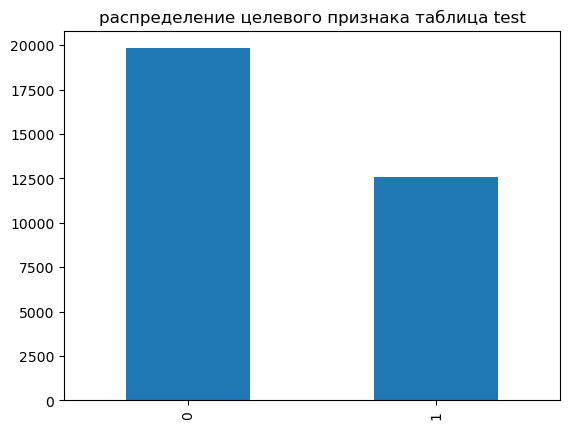

In [10]:
#распределение целевого признака таблица test
test['is_canceled'].value_counts().plot(kind='bar')
plt.title('распределение целевого признака таблица test')
plt.show()

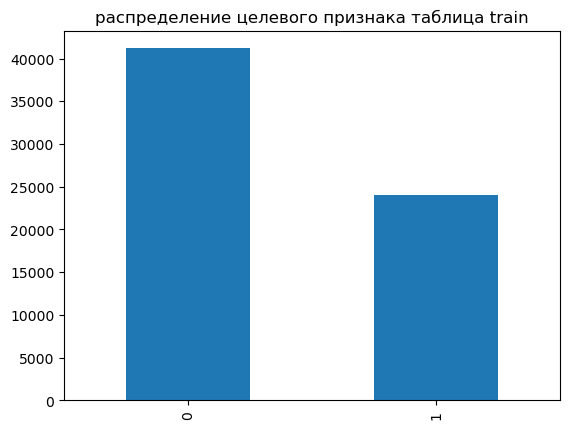

In [11]:
#распределение целевого признака таблица train
train['is_canceled'].value_counts().plot(kind='bar')
plt.title('распределение целевого признака таблица train')
plt.show()

**Вывод:**
- Познакомились с таблицами, итого у нас 97641 объекта и 25 признаков для каждого, на первый взгляд никаких аномалий не видно
- У целевого признака в 2х таблицах присутствует дисбаланс классов

## 2. Предобработка и исследовательский анализ данных

In [12]:
#изучим столбцы
test.columns

Index(['id', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'booking_changes', 'days_in_waiting_list',
       'customer_type', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_nights'],
      dtype='object')

In [13]:
#напишем функцию, которая покажет уникальные значения, пропуски, дубликаты
def checker(table):
    col = ['id', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'booking_changes', 'days_in_waiting_list',
       'customer_type', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_nights']
    for elem in col:
        print(elem)
        print(table[elem].unique())
        print()
    print('Дубликатов:',table.duplicated().sum())
    print('Пропусков:\n',table.isna().sum())
    

In [14]:
#таблица тест
checker(test)

id
[ 6086  6087  6088 ... 97901 97902 97903]

is_canceled
[1 0]

lead_time
[ 74.  62.  71. 172.  52. 143.  21.  89.  48.  31.  20. 173.  23.  46.
 149.  44.  68.   6.  43. 112.  59.  93.   4. 115. 187.  11.   2.  15.
  66. 113. 125. 161. 154.   1.   0.  35.  37.  60. 129.  78.  10.  82.
   8.  22.  33. 108.  87. 106.  45.  40.  17.   5.  16.   3.  41. 135.
 123. 128.  47.  12. 124. 160.  58.  65. 281.  24.  30.  27.   9.  94.
 219.  84.  79.  72.  36. 292. 186.  85. 169. 166.  28.  83. 111.  54.
 200.  80. 102.  95. 170. 307. 298.  55.  77.  32.  25. 238.   7.  19.
 211. 137.  39.  18. 206.  42. 179. 205. 142.  38.  92.  56.  29. 119.
  73. 320.  34. 127.  69.  13. 140.  14. 164.  51.  70. 120.  76. 105.
  50. 191.  26.  75. 116. 184.  53.  49.  63. 194. 167. 312. 171. 218.
  86. 100. 146.  64. 148.  81.  88.  57. 339. 332. 133. 208.  61. 177.
 157. 278. 285. 210. 232. 139. 134. 204. 201. 216. 340. 350. 214. 226.
 273. 103. 136. 176. 180. 192. 175. 145. 162. 174. 117. 255. 364. 121.
 2

In [15]:
#таблица обучающая
checker(train)

id
[    0     1     2 ... 84094 84117 84121]

is_canceled
[0 1]

lead_time
[  7.  14.   0.   9.  85.  75.  23.  18.  68.  37.  72.  48.  77.  99.
  40.  15.  36.  70.  45.  16. 107.  47.  96. 113.  50.   3.   1.  10.
   5.  17.  93.  71.  63.  62. 101.   2.  81.  12. 109. 102.   4.  92.
  95.  86.  78.  29.  30.  51.  33.   8. 100.  80.  97.  64.  90.  27.
  82.  94. 115. 111.  98.  66. 104.  65.  55.  21.  88.  43.  54. 280.
  24. 103. 249.  13.  79.  35.  31.  34.  44. 304. 117.  84. 110.  59.
 116.  91.  42.  60. 321.  32.  56.  41.  76.  49.  73. 112.  39.  58.
  57.  19.  53.  38.   6. 108.  26. 123.  28. 118.  46.  69.  52.  89.
  61.  22.  67. 105.  25.  11.  87. 299.  74. 298. 119.  20.  83. 136.
 129. 124. 130. 131. 139. 122. 106. 137. 120. 135. 150. 143. 151. 126.
 147. 128. 156. 132. 164. 159. 161. 333. 149. 154. 297. 163. 314. 323.
 340. 142. 302. 175. 166. 114. 140. 157. 310. 172. 145. 121. 127. 178.
 152. 158. 125. 185. 177. 165. 200. 192. 174. 134. 350. 283. 160. 133.
 1

In [16]:
test.drop('id',inplace=True,axis=1)
train.drop('id',inplace=True,axis=1)

In [17]:
print('Таблица test:',test.duplicated().sum())
print('Таблица train:',train.duplicated().sum())

Таблица test: 7717
Таблица train: 21377


In [18]:
#удаляем явные дубликаты
test.drop_duplicates(inplace=True)
train.drop_duplicates(inplace=True)

In [19]:
#проверяем
print('Таблица test:',test.duplicated().sum())
print('Таблица train:',train.duplicated().sum())

Таблица test: 0
Таблица train: 0


In [20]:
#смотрим
train['meal'].unique(), train['reserved_room_type'].unique()

(array(['BB       ', 'FB       ', 'HB       ', 'SC       ', 'SC'],
       dtype=object),
 array(['A               ', 'C               ', 'D               ',
        'E               ', 'G               ', 'F               ',
        'B               '], dtype=object))

In [21]:
#исправляем с помощью метода strip()
train['meal'] = train['meal'].str.strip()
train['reserved_room_type'] = train['reserved_room_type'].str.strip()

In [22]:
#проверяем
train['meal'].unique(), train['reserved_room_type'].unique()

(array(['BB', 'FB', 'HB', 'SC'], dtype=object),
 array(['A', 'C', 'D', 'E', 'G', 'F', 'B'], dtype=object))

In [23]:
#таблица тест
test['meal'].unique(), test['reserved_room_type'].unique()

(array(['BB       ', 'HB       ', 'SC', 'FB       ', 'SC       '],
       dtype=object),
 array(['A               ', 'E               ', 'G               ',
        'D               ', 'F               ', 'C               ',
        'B               '], dtype=object))

In [24]:
#исправляем с помощью метода strip()
test['meal'] = test['meal'].str.strip()
test['reserved_room_type'] = test['reserved_room_type'].str.strip()

In [25]:
#проверяем
test['meal'].unique(), test['reserved_room_type'].unique()

(array(['BB', 'HB', 'SC', 'FB'], dtype=object),
 array(['A', 'E', 'G', 'D', 'F', 'C', 'B'], dtype=object))

In [26]:
test['arrival_date_year'].unique()

array([2017], dtype=int64)

In [27]:
test['arrival_date_month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August'], dtype=object)

In [28]:
#заменим значения чтобы в дальнейшем использовать их
test = test.replace({'arrival_date_month':
                     {'January': 1,
                      'February': 2,
                      'March': 3,
                      'April': 4,
                      'May': 5,
                      'June': 6,
                      'July': 7,
                      'August': 8}
                    })

In [29]:
#проверим
test['arrival_date_month'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [30]:
#для таблицы train
train['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [31]:
#заменим значения для удобства
train = train.replace({'arrival_date_month':
                     {'January': 1,
                      'February': 2,
                      'March': 3,
                      'April': 4,
                      'May': 5,
                      'June': 6,
                      'July': 7,
                      'August': 8,
                      'September': 9,
                      'October': 10,
                      'November': 11,
                      'December': 12}
                    })

In [32]:
#проверим
train['arrival_date_month'].unique()

array([ 7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6], dtype=int64)

In [33]:
#функция, которая покажет нам распределение признаков
def distribution(table,name):
    for col in table[['lead_time','babies','children','stays_in_weekend_nights',
                      'stays_in_week_nights','days_in_waiting_list',
                      'previous_cancellations','adults','total_nights']]:
        print(f'Таблица {name}, признак: {col}')
        sns.boxplot(x=table[col])
        plt.show(f'Таблица {name}, признак: {col}')

**Распределения признаков таблица train**

Таблица train, признак: lead_time


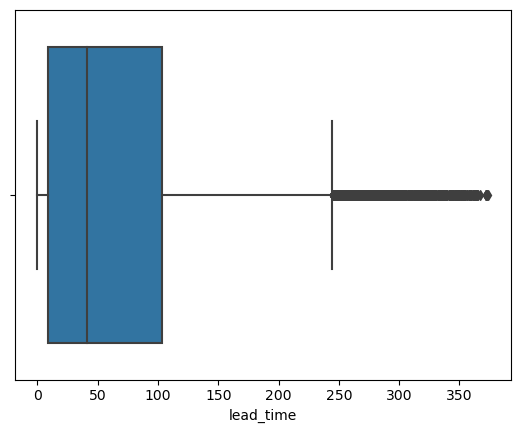

Таблица train, признак: babies


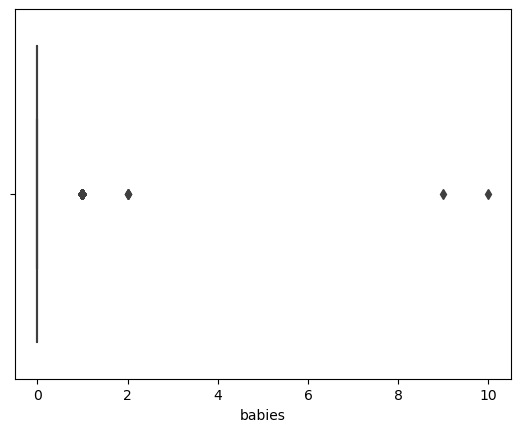

Таблица train, признак: children


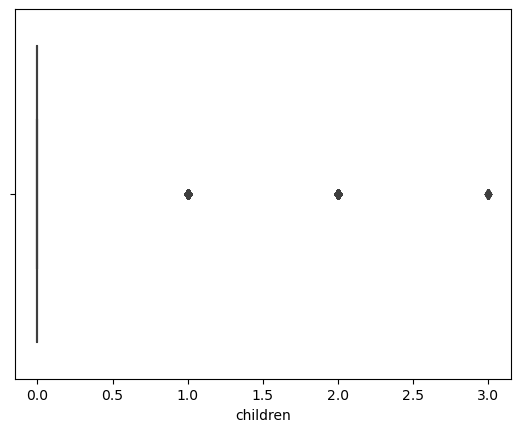

Таблица train, признак: stays_in_weekend_nights


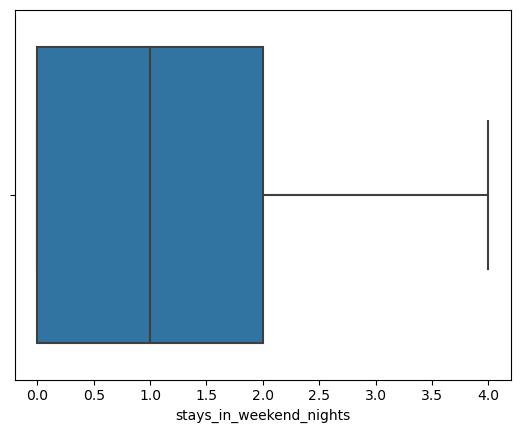

Таблица train, признак: stays_in_week_nights


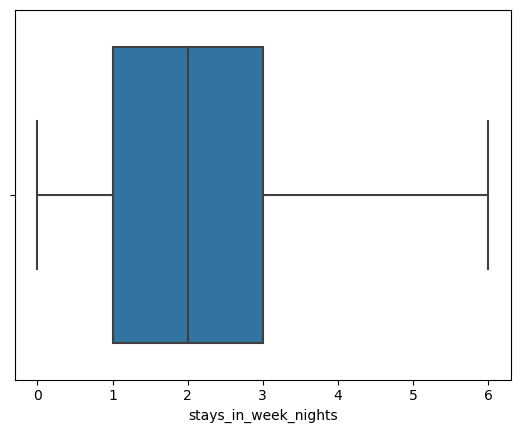

Таблица train, признак: days_in_waiting_list


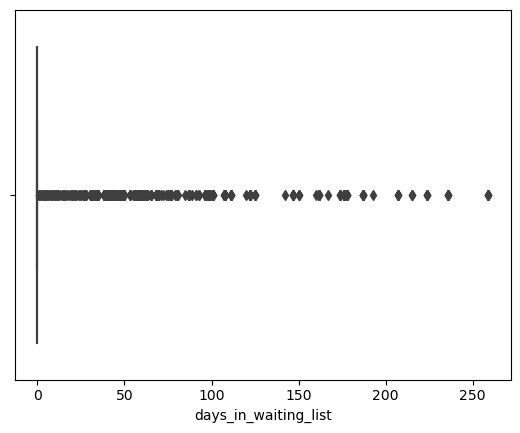

Таблица train, признак: previous_cancellations


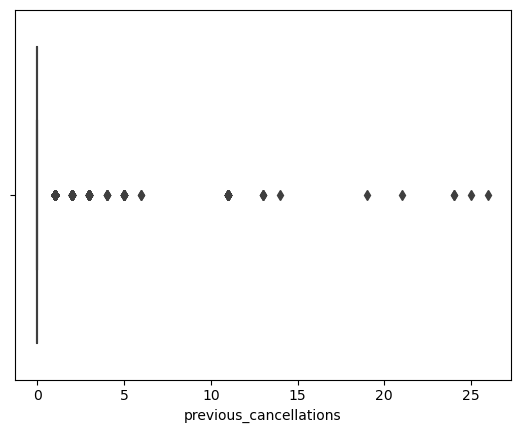

Таблица train, признак: adults


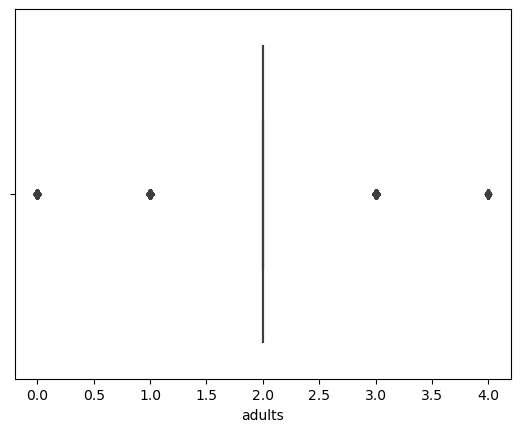

Таблица train, признак: total_nights


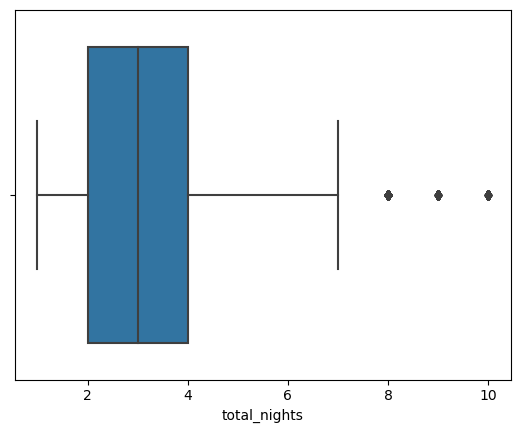

In [34]:
#таблица train
distribution(train,'train')

- Более детально посмотрим на признаки с выбросами

In [35]:
#значения признака total_nights
train['total_nights'].value_counts()

3     9632
1     9359
2     8442
4     7216
5     3599
7     3280
6     1609
8      477
9      124
10     114
Name: total_nights, dtype: int64

In [36]:
#значения признака adults
train['adults'].value_counts()

2.0    32299
1.0     8688
3.0     2688
0.0      164
4.0       13
Name: adults, dtype: int64

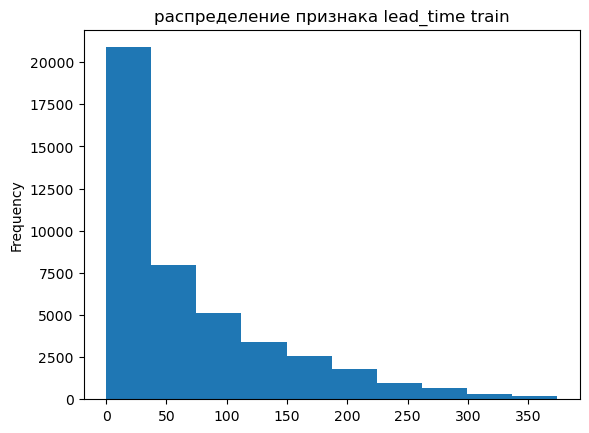

In [37]:
#гистограмма признака lead_time
train['lead_time'].plot(kind='hist')
plt.title('распределение признака lead_time train')
plt.show()

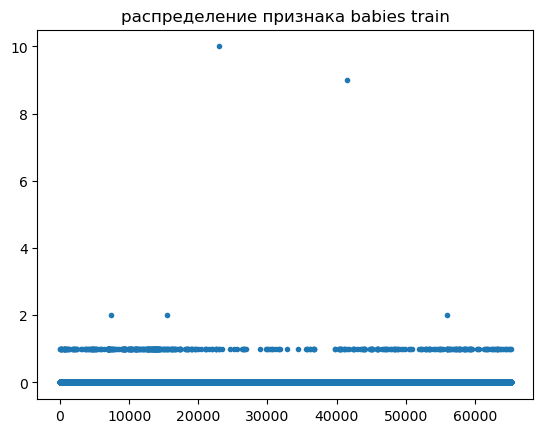

In [38]:
#более детально посмотрим
train['babies'].plot(style='.')
plt.title('распределение признака babies train')
plt.show()

In [39]:
#значения признака babies
train['babies'].value_counts()

0.0     43403
1.0       444
2.0         3
10.0        1
9.0         1
Name: babies, dtype: int64

- предлагаю сделать этот признак бинарным, т.к уникальных больше всего значений это 0 и 1

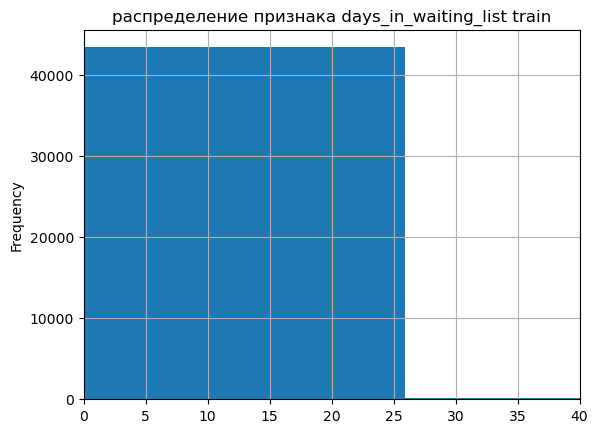

In [40]:
#более детально посмотрим
train['days_in_waiting_list'].plot(kind='hist',grid=True)
plt.xlim(0, 40) #0,27
plt.title('распределение признака days_in_waiting_list train')
plt.show()

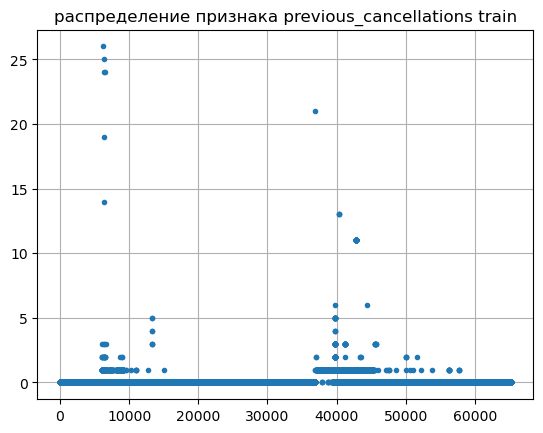

In [41]:
#смотрим матрицу рассеяния
train['previous_cancellations'].plot(style='.',grid=True)
plt.title('распределение признака previous_cancellations train')
plt.show()

In [42]:
#значения признака previous_cancellations
train['previous_cancellations'].value_counts()

0     42701
1       995
2        52
3        47
11       27
5        13
4         5
13        3
24        2
6         2
26        1
25        1
14        1
19        1
21        1
Name: previous_cancellations, dtype: int64

In [43]:
#значения признака previous_cancellations
train['children'].value_counts()

0.0    40471
1.0     2060
2.0     1305
3.0       16
Name: children, dtype: int64

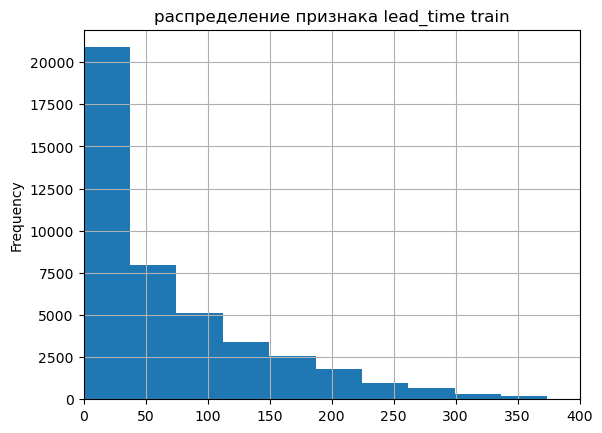

In [44]:
#смотрим распределение
train['lead_time'].plot(kind='hist',grid=True)
plt.xlim(0,400)
plt.title('распределение признака lead_time train')
plt.show()

In [45]:
#смотрим размер до
train.shape

(43852, 24)

In [46]:
#избавляемся от выбросов
train = train.query('lead_time <= 350 & previous_cancellations <= 1 & days_in_waiting_list <=25 & adults <= 3 & babies <= 1')

In [47]:
#проверем
train['previous_cancellations'].value_counts()

0    42236
1      956
Name: previous_cancellations, dtype: int64

In [48]:
#проверем
train['adults'].value_counts()

2.0    31933
1.0     8421
3.0     2674
0.0      164
Name: adults, dtype: int64

In [49]:
#проверем
train['babies'].value_counts()

0.0    42749
1.0      443
Name: babies, dtype: int64

In [50]:
#смотрим
train['days_in_waiting_list'].value_counts()

0     43115
15       19
4        10
6         4
8         4
17        3
1         3
21        3
25        3
20        3
22        3
11        3
10        3
9         2
19        2
12        2
5         2
24        2
3         2
2         2
13        1
14        1
Name: days_in_waiting_list, dtype: int64

In [51]:
#удаляем признак days_in_waiting_list
train.drop('days_in_waiting_list',axis=1, inplace=True)

In [52]:
#проверим
'days_in_waiting_list' in train

False

In [53]:
#переименуем признаки
train = train.rename(columns=
                     {'babies': 'has_babies', 'previous_cancellations': 'has_previous_cancellations'}
                    ) 

In [54]:
#проверим
train.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'has_babies', 'meal', 'country', 'distribution_channel',
       'is_repeated_guest', 'has_previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'booking_changes', 'customer_type', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_nights'],
      dtype='object')

In [55]:
#смотрим размер после
train.shape

(43192, 23)

**Распределения признаков таблица test**

Таблица test, признак: lead_time


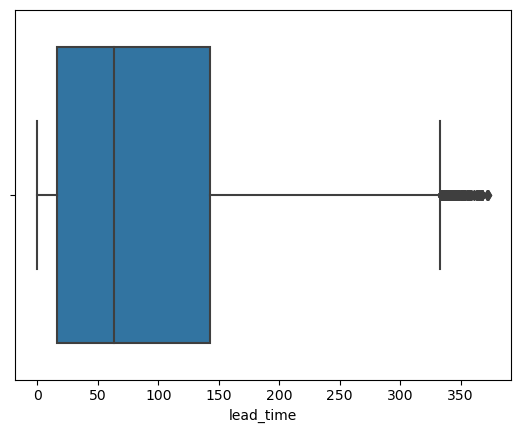

Таблица test, признак: babies


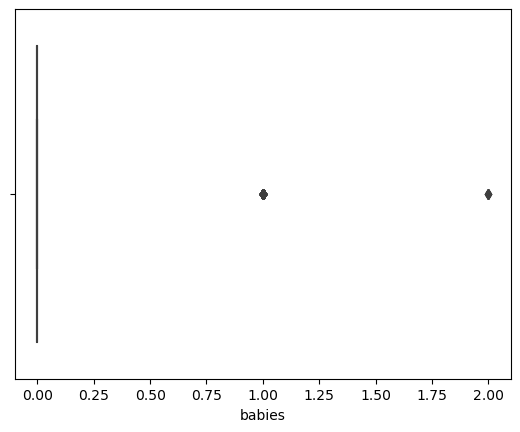

Таблица test, признак: children


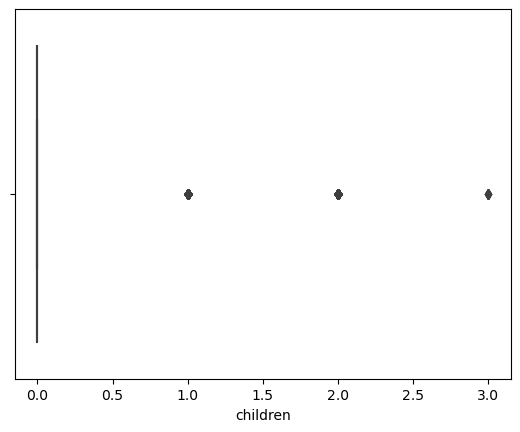

Таблица test, признак: stays_in_weekend_nights


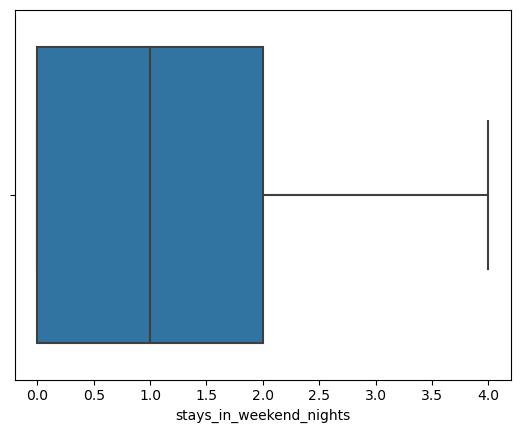

Таблица test, признак: stays_in_week_nights


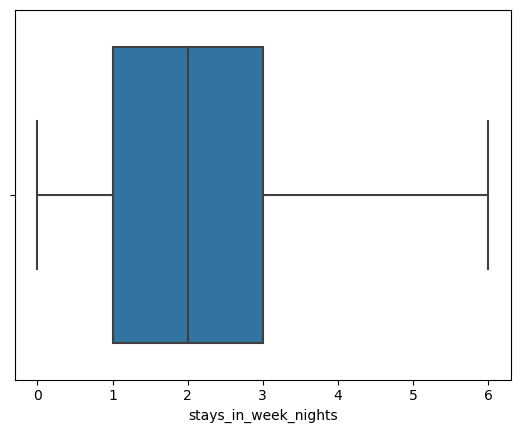

Таблица test, признак: days_in_waiting_list


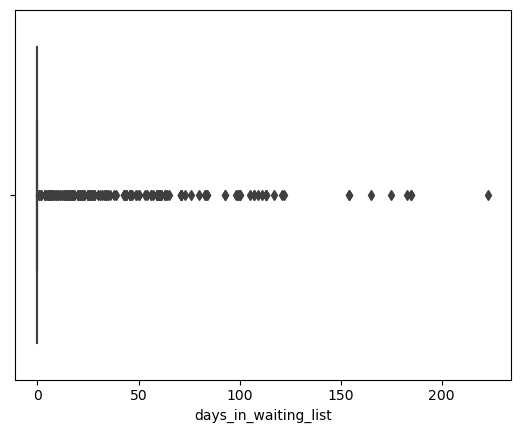

Таблица test, признак: previous_cancellations


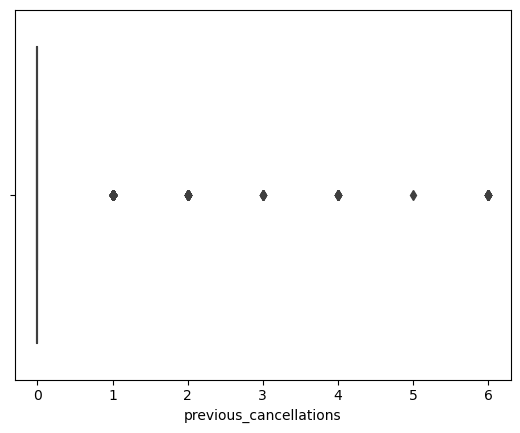

Таблица test, признак: adults


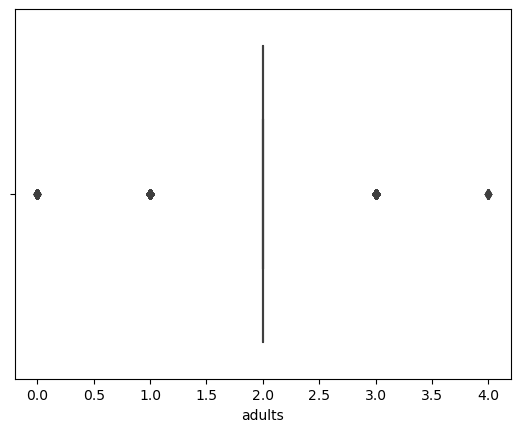

Таблица test, признак: total_nights


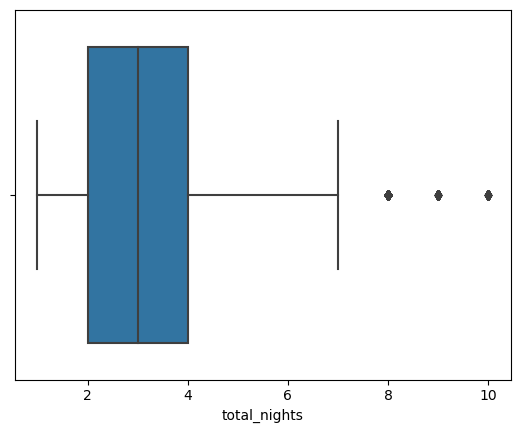

In [56]:
#таблица test
distribution(test,'test')

In [57]:
#смотрим размер до
test.shape

(24695, 24)

In [58]:
#удалим признак days_in_waiting_list
test.drop('days_in_waiting_list',axis=1,inplace=True)

In [59]:
#проверим
'days_in_waiting_list' in test 

False

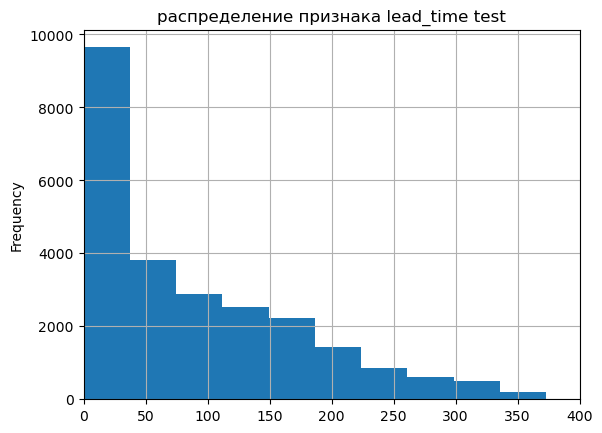

In [60]:
#смотрим распределения
test['lead_time'].plot(kind='hist',grid=True)
plt.xlim(0, 400)
plt.title('распределение признака lead_time test')
plt.show()

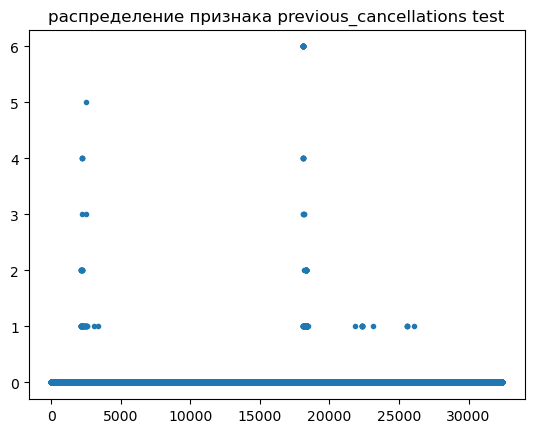

In [61]:
#смотрим распределения
test['previous_cancellations'].plot(style='.')
plt.title('распределение признака previous_cancellations test')
plt.show()

In [62]:
#уникальные значения признака previous_cancellations
test['previous_cancellations'].value_counts()

0    24472
1      162
2       29
6       15
4       10
3        6
5        1
Name: previous_cancellations, dtype: int64

In [63]:
#сделаем признак бинарным
test.loc[test['previous_cancellations'] > 0, 'previous_cancellations'] = 1

In [64]:
#проверим
test['previous_cancellations'].value_counts()

0    24472
1      223
Name: previous_cancellations, dtype: int64

In [65]:
#значения столбца babies
test['babies'].value_counts()

0.0    24521
1.0      170
2.0        4
Name: babies, dtype: int64

In [66]:
#значения столбца children
test['children'].value_counts()

0.0    22727
1.0     1322
2.0      641
3.0        5
Name: children, dtype: int64

In [67]:
#делаем признак бинарным
test.loc[test['babies'] > 0, 'babies'] = 1
#приводим к наиболее частотному значению
test.loc[test['children'] > 0, 'children'] = 2

In [68]:
#проверяем
test['babies'].value_counts(), test['children'].value_counts()

(0.0    24521
 1.0      174
 Name: babies, dtype: int64,
 0.0    22727
 2.0     1968
 Name: children, dtype: int64)

In [69]:

test['lead_time'].value_counts()

0.0      1292
1.0       741
2.0       454
3.0       370
4.0       348
         ... 
349.0       2
347.0       2
366.0       1
354.0       1
367.0       1
Name: lead_time, Length: 368, dtype: int64

In [70]:
#избавляемся от выбросов в таблице test
test = test.query('lead_time <=350')

In [71]:
#смотрим размер после
test.shape

(24606, 23)

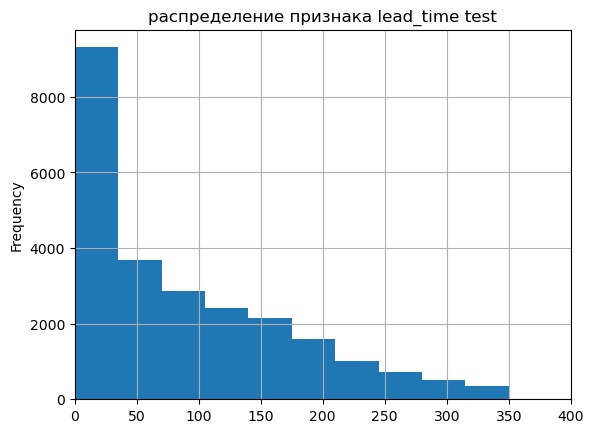

In [72]:
#проверяем
test['lead_time'].plot(kind='hist',grid=True)
plt.xlim(0, 400)
plt.title('распределение признака lead_time test')
plt.show()

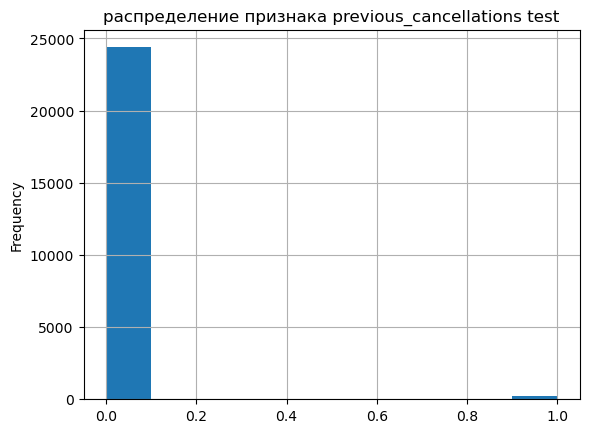

In [73]:
#проверяем
test['previous_cancellations'].plot(kind='hist',grid=True)
plt.title('распределение признака previous_cancellations test')
plt.show()

In [74]:
#переименуем признаки
test = test.rename(columns=
                     {'babies': 'has_babies', 'previous_cancellations': 'has_previous_cancellations'}
                    ) 

In [75]:
#проверим
test.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'has_babies', 'meal', 'country', 'distribution_channel',
       'is_repeated_guest', 'has_previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'booking_changes', 'customer_type', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_nights'],
      dtype='object')

**Вывод:**
- Значения столбцов meal и reserved_room_type в двух таблицах имеют отступы, которые мы успешно исправили
- Дубликатов не нашли
- Пропущенные значения отсутствуют
- Так же заменили значения в столбце arrival_date_month для удобства
- Изучили распределения числовых признаков, удалили выбросы в двух таблицах в столбцах:
  - lead_time
  - days_in_waiting_list
  - previous_cancellations

In [76]:
#проверка данных на адекватность
train[train['adults'] == 0]

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,distribution_channel,is_repeated_guest,has_previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
17540,0,1.0,2015,8,33,10,1,1,0.0,3.0,...,Direct,0,0,0,B,1,Transient-Party,0,0,2
17598,0,104.0,2015,8,33,11,0,3,0.0,2.0,...,TA/TO,0,0,0,B,1,Transient-Party,0,2,3
17982,0,3.0,2015,8,34,16,2,0,0.0,2.0,...,Direct,0,0,0,B,1,Transient-Party,0,1,2
21556,1,48.0,2015,10,43,19,1,3,0.0,2.0,...,TA/TO,0,0,0,B,0,Transient-Party,0,1,4
22516,1,6.0,2015,12,51,13,1,0,0.0,3.0,...,TA/TO,0,0,0,B,0,Transient-Party,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64751,0,197.0,2016,12,52,21,1,4,0.0,3.0,...,TA/TO,0,0,0,A,7,Transient-Party,0,0,5
64882,0,104.0,2016,12,53,25,2,1,0.0,2.0,...,TA/TO,0,0,0,B,1,Transient,0,2,3
64892,0,104.0,2016,12,53,25,2,1,0.0,2.0,...,TA/TO,0,0,0,B,0,Transient,0,2,3
64903,0,247.0,2016,12,52,24,2,3,0.0,2.0,...,TA/TO,0,0,0,B,0,Transient,0,1,5


In [77]:
#проверка данных на адекватность таблица test
test[test['adults'] == 0]

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,distribution_channel,is_repeated_guest,has_previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
7743,1,111.0,2017,1,1,2,1,3,0.0,2.0,...,TA/TO,0,0,0,B,0,Transient,0,2,4
7751,1,268.0,2017,1,1,2,1,4,0.0,2.0,...,TA/TO,0,0,0,B,0,Transient,0,1,5
8772,1,148.0,2017,2,6,5,2,5,0.0,2.0,...,TA/TO,0,0,0,B,0,Transient,0,2,7
9243,1,134.0,2017,2,8,22,2,4,0.0,2.0,...,TA/TO,0,0,0,B,0,Transient,0,1,6
9305,1,148.0,2017,2,8,24,2,2,0.0,2.0,...,TA/TO,0,0,0,B,1,Transient,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30601,0,296.0,2017,7,30,27,1,3,0.0,2.0,...,TA/TO,0,0,0,B,0,Transient,0,1,4
30654,0,276.0,2017,7,31,30,2,1,0.0,2.0,...,TA/TO,0,0,0,B,1,Transient,0,2,3
30678,0,291.0,2017,7,30,29,2,2,0.0,2.0,...,TA/TO,0,0,0,B,0,Transient,0,1,4
30815,0,159.0,2017,7,31,31,1,3,0.0,2.0,...,TA/TO,0,0,0,A,1,Transient,0,1,4


In [78]:
#исправляем
train = train.loc[train['adults'] > 0]
test = test.loc[test['adults'] > 0]

In [79]:
#проверяем
len(train.loc[train['adults'] == 0]), len(test.loc[test['adults'] == 0])

(0, 0)

**Вывод v3:**
- Доделали предобработку таблиц:
  - После удаления  'id', удалили дубликаты,
  - Признаки  previous_cancellations и babies сделали бинарными т.к бОльшее кол-во значений 0 и 1
  - Проверили данные на адекватность, действительно, без взрослых номер снять не получится, исправили это

### 2.1 Портрет отказчика

- Напишем функцию для визуализации статистической зависимости между отмененой брони и признаками которые нам доступны

In [80]:
def rejection(table1, table2):
    table = pd.concat([table1, table2])
    col = ['arrival_date_month',
           'arrival_date_day_of_month', 'stays_in_weekend_nights',
           'stays_in_week_nights', 'adults', 'children', 'has_babies', 'meal',
           'distribution_channel', 'is_repeated_guest',
           'has_previous_cancellations',
           'reserved_room_type', 'booking_changes', 
           'customer_type', 'required_car_parking_spaces',
           'total_of_special_requests', 'total_nights']
    for feature in col:
        print(f'Зависимость отмены от признака: {feature}')
        sns.countplot(x = feature, hue='is_canceled', data=table)
        sns.set(rc={'figure.figsize':(10,5)})
        plt.show()    

Зависимость отмены от признака: arrival_date_month


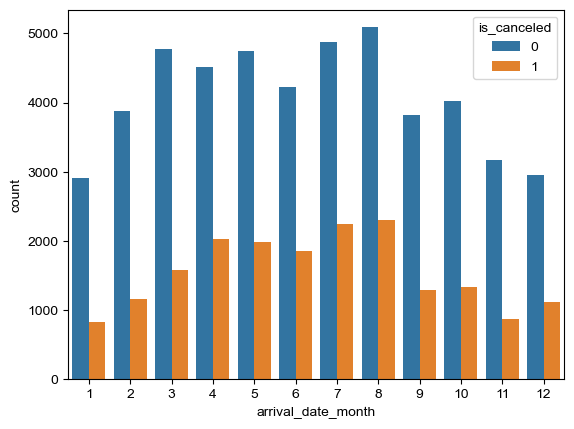

Зависимость отмены от признака: arrival_date_day_of_month


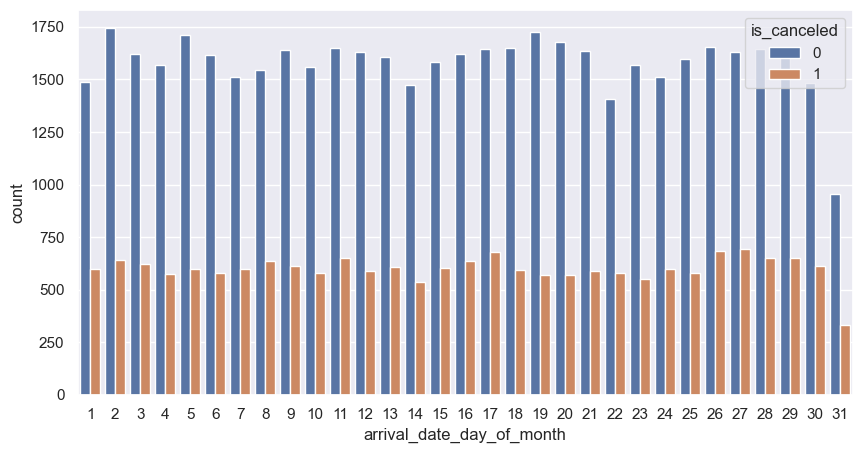

Зависимость отмены от признака: stays_in_weekend_nights


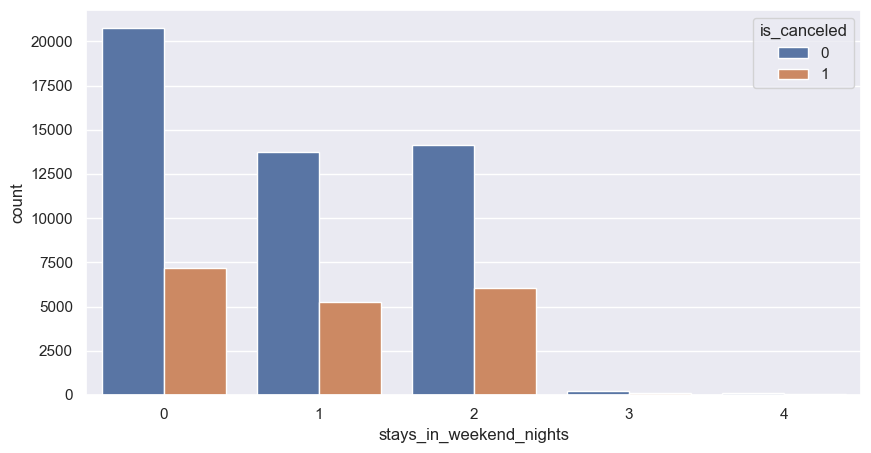

Зависимость отмены от признака: stays_in_week_nights


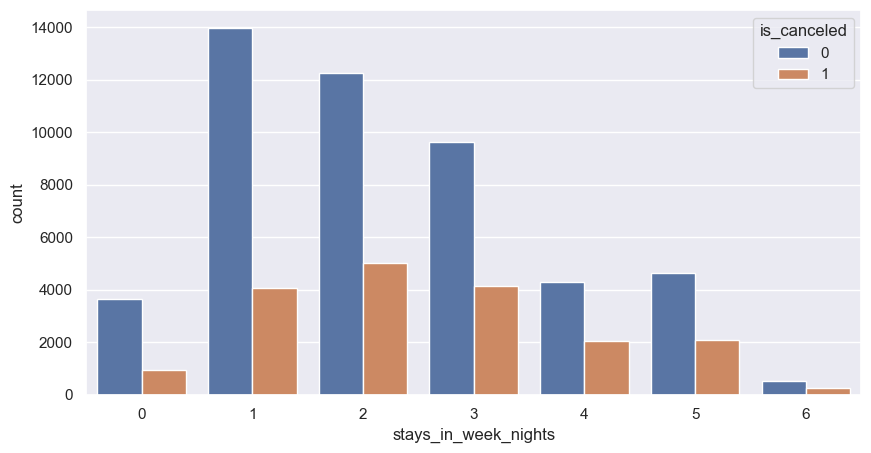

Зависимость отмены от признака: adults


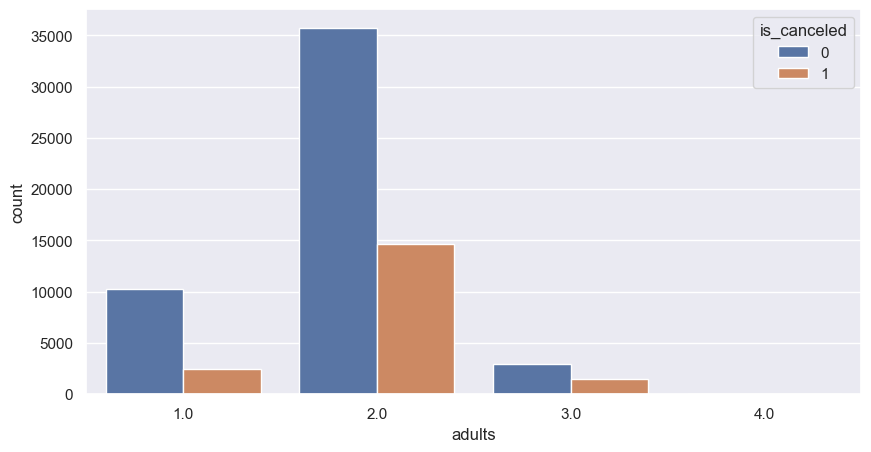

Зависимость отмены от признака: children


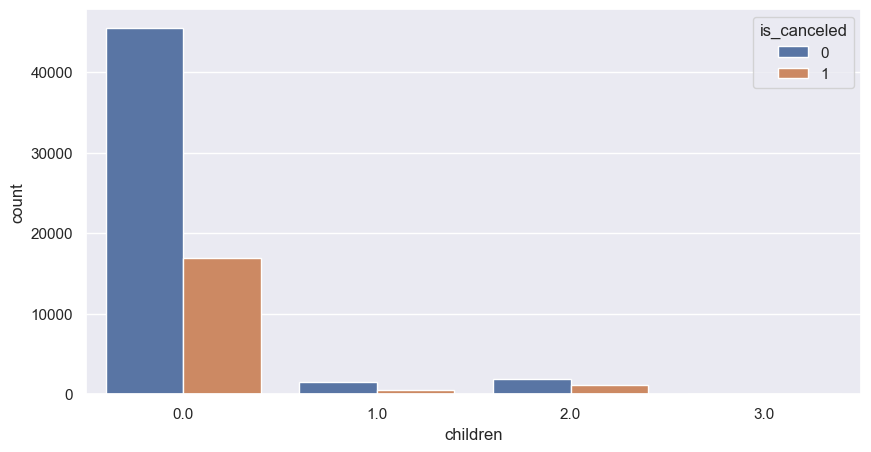

Зависимость отмены от признака: has_babies


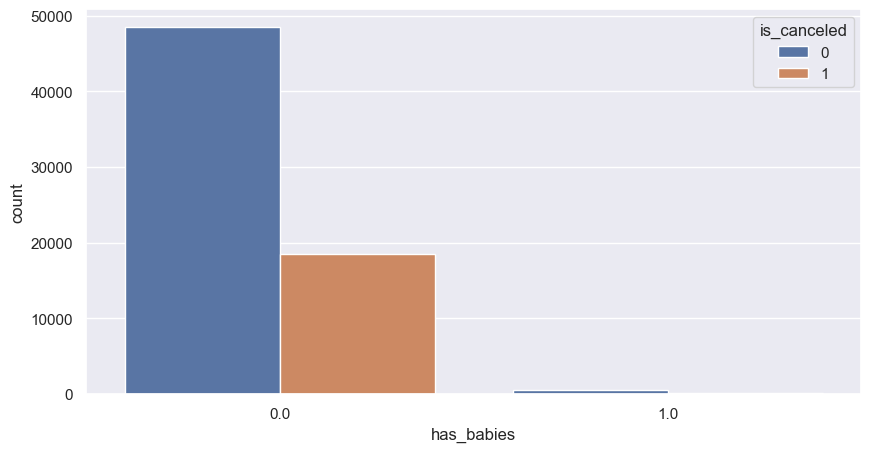

Зависимость отмены от признака: meal


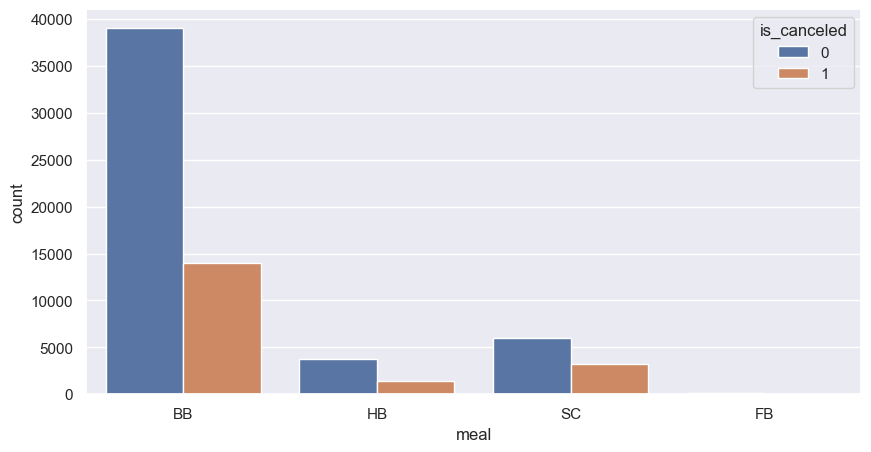

Зависимость отмены от признака: distribution_channel


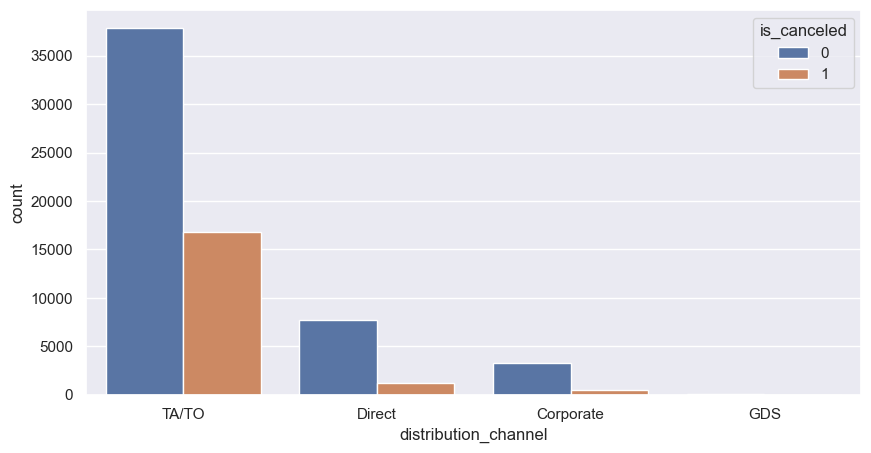

Зависимость отмены от признака: is_repeated_guest


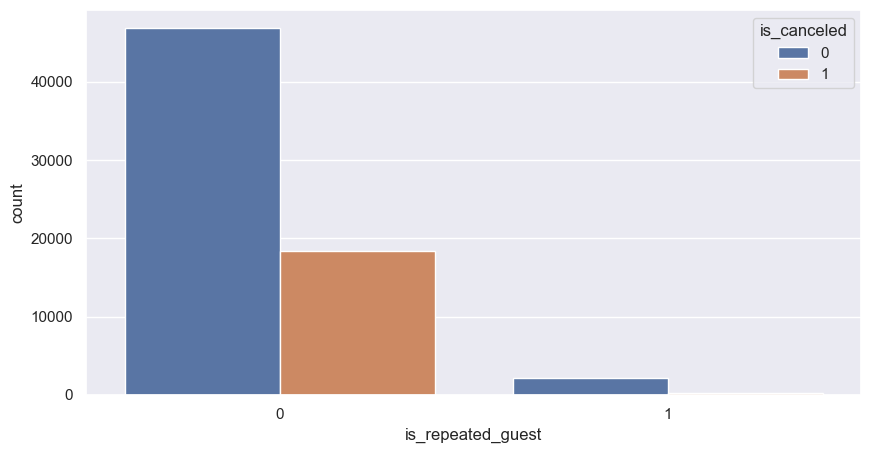

Зависимость отмены от признака: has_previous_cancellations


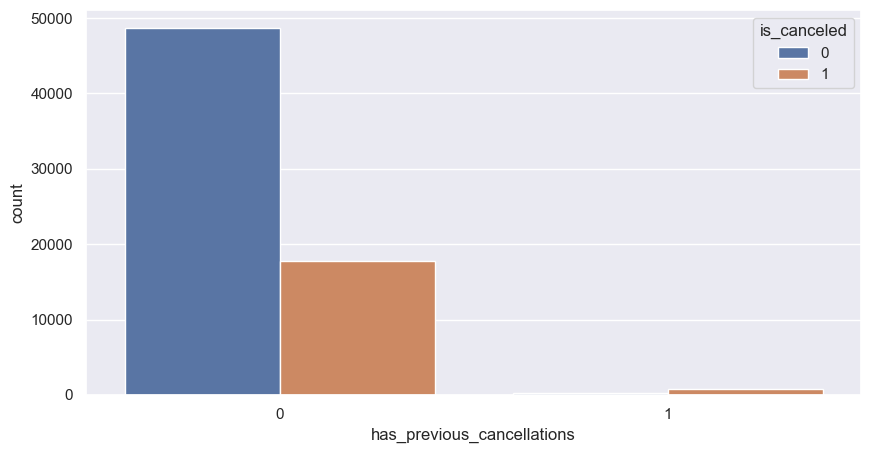

Зависимость отмены от признака: reserved_room_type


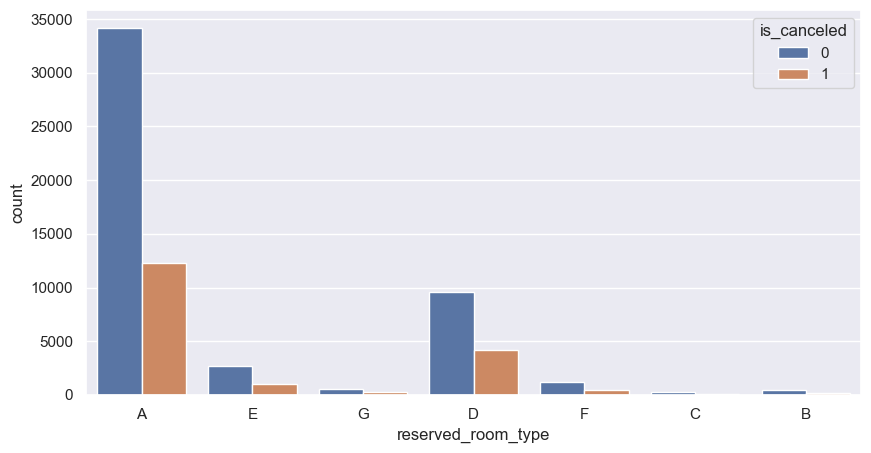

Зависимость отмены от признака: booking_changes


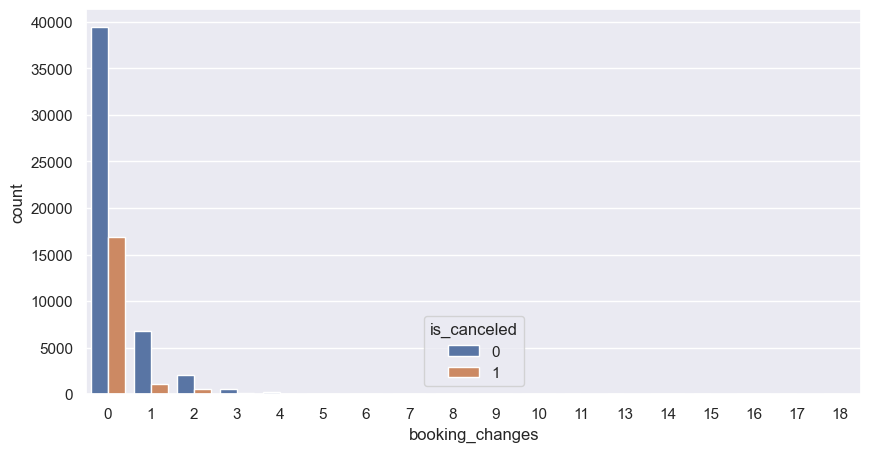

Зависимость отмены от признака: customer_type


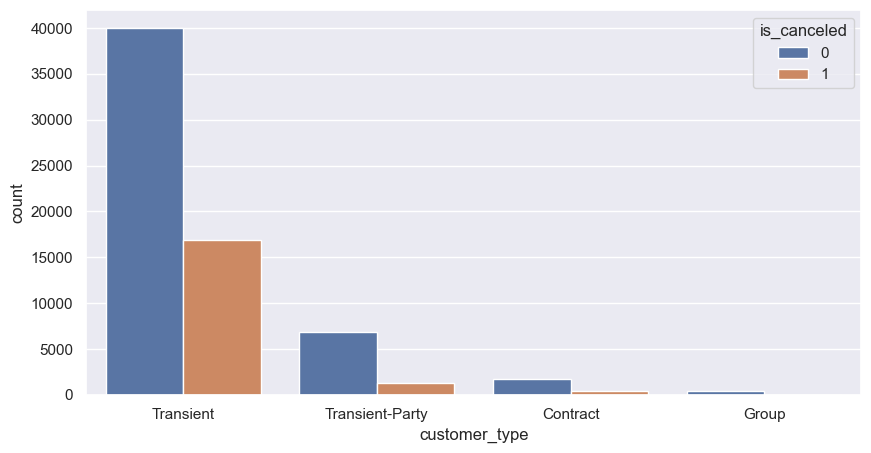

Зависимость отмены от признака: required_car_parking_spaces


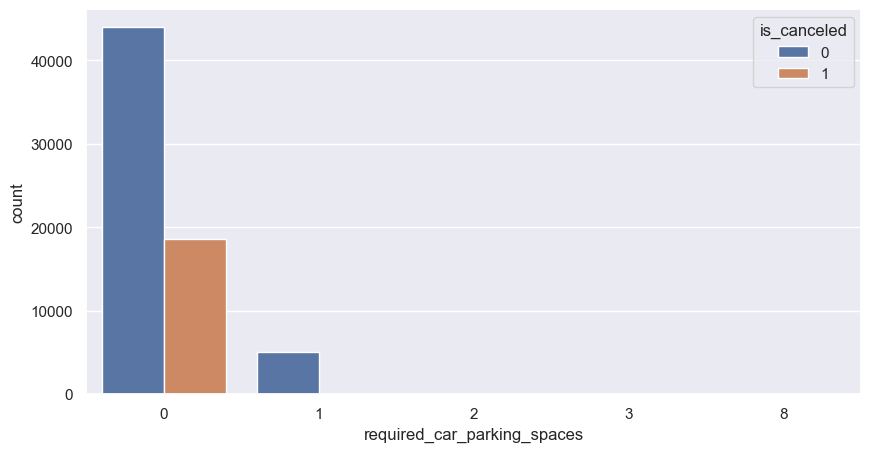

Зависимость отмены от признака: total_of_special_requests


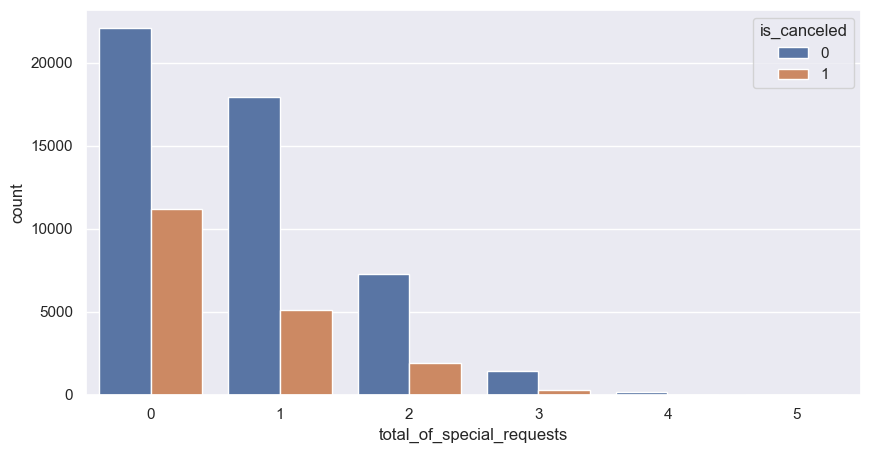

Зависимость отмены от признака: total_nights


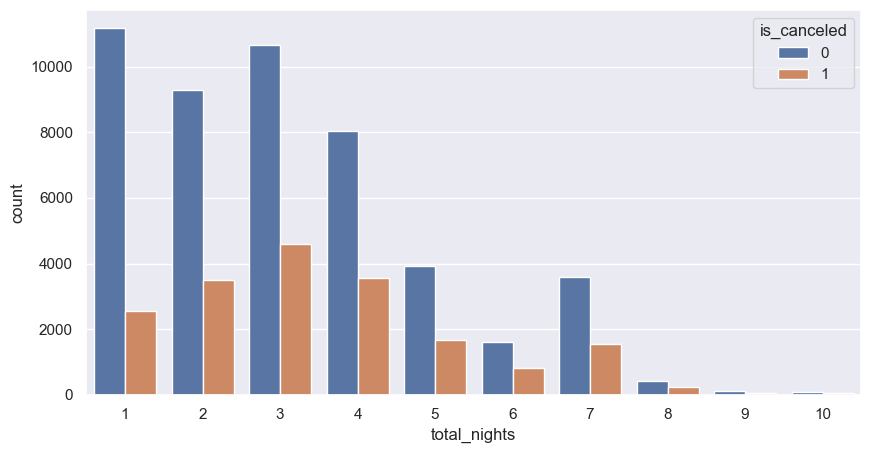

In [81]:
rejection(test, train)

#### Вывод: 
<a id='reject'></a>

1. `arrival_date_month` - месяц заезда, на графике видно, что пик отмены приходится на 3,5,6 месяцы(апрель, май, июнь) самый пик это апрель, с чем это связано сложно предположить
2. `arrival_date_day_of_month` — день заезда, больше всего отмен приходится на 26 день месяца, явной тенденции здесь не могу выделить
3. `stays_in_weekend_nights` — количество ночей в выходные дни, на графике видно, что пик отмен приходится на 0 ночей, т.е клиенты, которые не заказывают отель на выходные дни чаще как отменяют бронь так и не отменяют
4. `stays_in_week_nights` — количество ночей в будние дни, видно, что пик приходится на 2 ночи в будние дни, т.е вероятность что клиент откажется от брони при заказе 2 ночей выше чем например на 1 ночь или 3 в будни
5. `adults` — количество взрослых постояльцев, чаще всего отказываются 2 взрросылх
6. `children`— количество детей от 3 до 14 лет,babies — количество младенцев, чаще всего отказываются без детей и без младенцев
7. `meal` — опции заказа, чаще всего отказывают те клиенты, у которых в стоимость включен завтрак
8. `distribution_channel` — канал дистрибуции заказа, чаще всего как отказываются так и не отказываются клиенты пришедшие через канал TA/TO
9. `is_repeated_guest` — признак того, что гость бронирует номер второй раз, чаще всего отменяют те клиенты, которые не посещали отель
10. `previous_cancellations` — количество отменённых заказов у клиента, немного не понял этот признак, т.е те клиенты которые не отменяли заказ их больше, чем тех которые не отменяли, но отменили бронь
11. `reserved_room_type` — тип забронированной комнаты, чаще всего отменяют бронь клиенты заказывающие самую дорогую комнату
12. `booking_changes` — количество изменений параметров заказа, чаще всего отменяют бронь те клиенты, которые не меняли гиперпараметры заказа
13. `customer_type` — тип заказчика,  чаще всего отменяют заказ клиенты из категории transient
14. `required_car_parking_spaces` — необходимость места для автомобиля, чаще всего отменяют без парковки
15. `total_of_special_requests` — количество специальных отметок, чаще всего отменяют без специальных отметок
16. `total_nights` — общее количество ночей, чаще всего отменяют заказ те кто снимает всего на 2-3 ночи, пик на 3
- **Отказчик это клиент который заказывает в апреле или мае или июне, 26-27 числа, без ночей в выходные дни или на 2-3 ночи в будни, скорее всего он будет не один или не одна, без детей, без младенцев, с включенным завтраком, пришедшим через канал TA/TO, еще не заказывавшем отель, бронирующим самую дорогую комнату, не меняю условия брони, из категории transient, без машины, без специальных отметок**

- - [общий вывод](#end)

In [82]:
#смотрим корреляции между признаками
print('Корреляция между отменой и кол-во ночей в выходные дни:',train['is_canceled'].corr(train['stays_in_weekend_nights']))
print('Корреляция между отменой и кол-во ночей в будние дни:',train['is_canceled'].corr(train['stays_in_week_nights']))
print('Корреляция между отменой и кол-вом ночей:',train['is_canceled'].corr(train['total_nights']))

Корреляция между отменой и кол-во ночей в выходные дни: 0.03696191001089948
Корреляция между отменой и кол-во ночей в будние дни: 0.07011126727748378
Корреляция между отменой и кол-вом ночей: 0.07137760490100678


In [83]:
#проверим что признак total_nights это сумма stays_in_week_nights и stays_in_weekend_nights
print(train['total_nights'].sum())
print((train['stays_in_week_nights'] + train['stays_in_weekend_nights']).sum())

138121
138121


In [84]:
#проверим что признак total_nights это сумма stays_in_week_nights и stays_in_weekend_nights
print(test['total_nights'].sum())
print((test['stays_in_week_nights'] + test['stays_in_weekend_nights']).sum())

80630
80630


In [85]:
#удалим признаки таблица train
train.drop(['stays_in_week_nights','stays_in_weekend_nights'],axis=1,inplace=True)
#удалим признаки таблица test
test.drop(['stays_in_week_nights','stays_in_weekend_nights'],axis=1,inplace=True)

In [86]:
#проверим
print('stays_in_week_nights' and  'stays_in_weekend_nights' in train)
print('stays_in_week_nights' and  'stays_in_weekend_nights' in test)

False
False


In [87]:
#для дальнейших расчетов сохраним таблицы после EDA
train_copy = train
test_copy = test
#
final_train = train.copy(deep=True)
final_test = test.copy(deep=True)

###  3. Формулировка ML-задачи на основе бизнес-задачи
- А давайте скажем, что прибыль отеля очень сильно зависит от того откажется ли клиент от номера или всё таки снимет, тогда если мы будем опрелелять клиента как отказчика, то мы предложим ему внести депозит, что позволит как минимум не потерять 80% дохода в случае отказа и возможно позволит ещё увеличить доход, так как большинство заказывает комнату категории A то 80% за 1 отказ получается 1400*0.8-400 = 720, что я думаю никто нехочет отдавать просто так
- Метрика: accuracy, потому что нам нужно точно определять отказчика как отказчика а клиента как клиента, чтобы не потерять лояльность, поэтому предлагаю использовать accuracy т.е долю правильных ответов

**Решение 1**<a id='model1'></a> 

#### Посмотрим важность признаков с помощью feature_importances_

- Функция-топ 30 стран, делаем срез по убыванию получается Series, index-уникальные значения, values-кол-во уникальных значений, от этого берем индекс т.е страны и превращаем в список, применяем лямбда-функцию если элемент не в списке новое значение 'other', иначе ничего не делай

In [88]:
#смотрим кол-во значений
len(train['country'].value_counts(ascending=False)), len(test['country'].value_counts(ascending=False))

(155, 142)

In [89]:
def world(table):
    top = table['country'].value_counts(ascending=False).head(30).index.tolist()
    table['country'] = table['country'].apply(lambda x: 'other' if x not in top else x)

In [90]:
#таблица train
world(train)

In [91]:
#таблица train
world(test)

In [92]:
#проверяем
len(train['country'].value_counts(ascending=False)), len(test['country'].value_counts(ascending=False))

(31, 31)

In [93]:
#для feature_importances_
X = pd.get_dummies(train,drop_first=True).drop(['is_canceled'],axis=1)
y = train['is_canceled'] 

In [94]:
model = DecisionTreeClassifier(random_state=11, max_depth=10,class_weight='balanced')
model.fit(X, y)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=11)

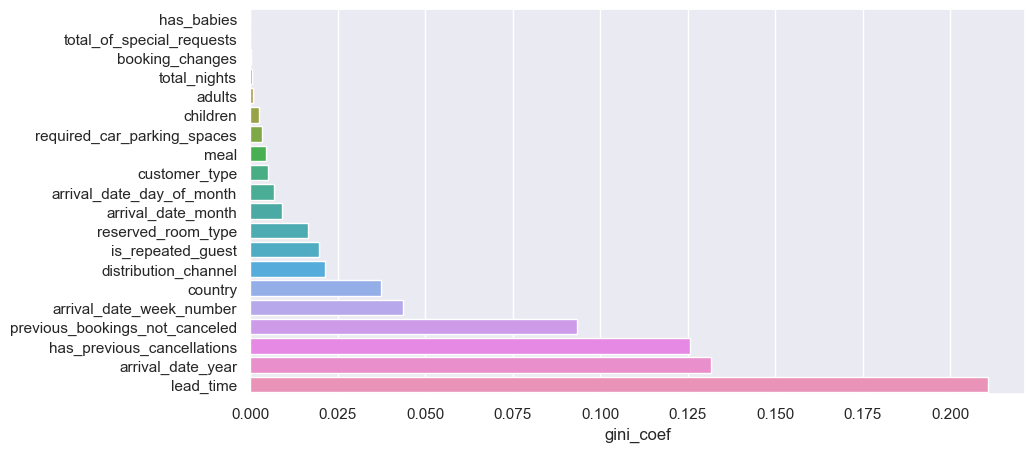

In [95]:
feats = {}
for feature,importace in zip(train.drop(['is_canceled'],axis=1), model.feature_importances_):
    feats[feature] = importace
data = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'gini_coef'}).sort_values(by='gini_coef')
#построим диаграмму
sns.barplot(data=data,x='gini_coef',y=data.index);

In [96]:
scaler = StandardScaler()
numeric = (['lead_time','arrival_date_month','arrival_date_day_of_month','adults','children','has_babies','total_nights',
          'arrival_date_year','arrival_date_week_number','total_of_special_requests']
          )
scaler.fit(X[numeric])

X[numeric] = scaler.transform(X[numeric])

#### Посмотрим важность признаков с помощью feature_importances_ на стандартизированных данных и удалим неделю прибытия и год 

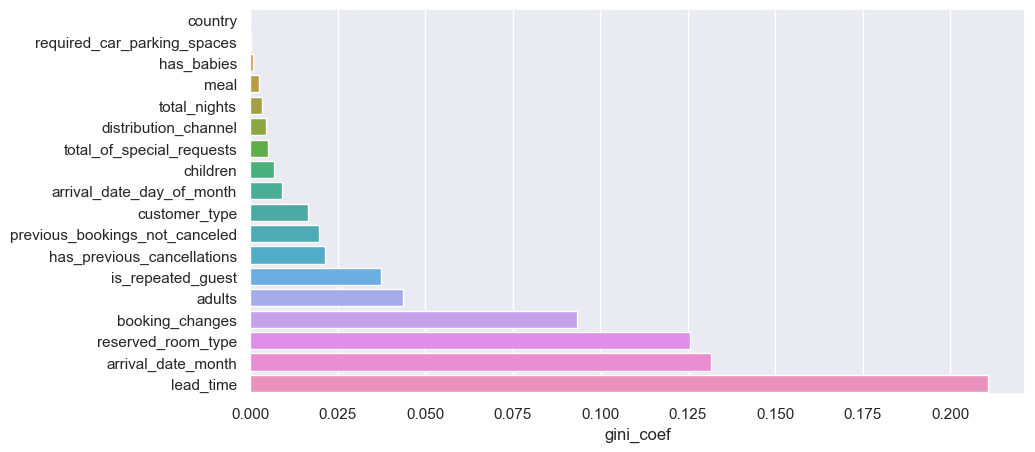

In [97]:
feats = {}
for feature,importace in zip(train.drop(['is_canceled','arrival_date_year','arrival_date_week_number'],axis=1), model.feature_importances_):
    feats[feature] = importace
data = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'gini_coef'}).sort_values(by='gini_coef')
#построим диаграмму
sns.barplot(data=data,x='gini_coef',y=data.index);

- Предлагаю удалить следующие признаки: 'arrival_date_year' - т.к там всего 2 значения в train и одно значение в test, мне кажется наша модель больше запутается и особо информации год прибытия не несет хотя на первом графике видно что это второй признак по значимости, 'arrival_date_week_number'- неделя заезда тоже особо информации в себе не несет, с остальными признаками возможно я поторопился)

In [98]:
X_train = train.drop(['is_canceled','arrival_date_year','arrival_date_week_number'],axis=1)
y_train = train['is_canceled']
#
X_test = test.drop(['is_canceled','arrival_date_year','arrival_date_week_number'],axis=1)
y_test = test['is_canceled']

In [99]:
#кодируем с помощью ordinalEncoder
encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=2077) 
encoder.fit(X_train) 

X_train_ord = pd.DataFrame(encoder.transform(X_train), columns=X_train.columns)
X_test_ord = pd.DataFrame(encoder.transform(X_test), columns=X_test.columns)

In [100]:
#масштабируем данные
scaler = StandardScaler()
numeric = (['lead_time','arrival_date_month','arrival_date_day_of_month','adults','children','has_babies','total_nights',
          'total_of_special_requests','meal','country','distribution_channel','customer_type']
          )
scaler.fit(X_train_ord[numeric])

X_train_ord[numeric] = scaler.transform(X_train_ord[numeric])

X_test_ord[numeric] = scaler.transform(X_test_ord[numeric])

In [101]:
#проверяем
X_train_ord

,lead_time,arrival_date_month,arrival_date_day_of_month,adults,children,has_babies,meal,country,distribution_channel,is_repeated_guest,has_previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,-0.825163,-0.121981,-1.681273,-1.768546,-0.266825,-0.101644,-0.472017,-0.493761,-1.649138,0.0,0.0,0.0,0.0,0.0,-0.078789,0.0,-0.840599,-1.175087
1,-0.727540,-0.121981,-1.681273,0.272628,-0.266825,-0.101644,-0.472017,-0.493761,0.482214,0.0,0.0,0.0,0.0,0.0,-0.078789,0.0,0.403700,-0.643380
2,-0.922786,-0.121981,-1.681273,0.272628,-0.266825,-0.101644,-0.472017,0.927226,-1.649138,0.0,0.0,0.0,2.0,0.0,-0.078789,0.0,-0.840599,-0.643380
3,-0.797271,-0.121981,-1.681273,0.272628,-0.266825,-0.101644,0.495215,0.927226,-1.649138,0.0,0.0,0.0,2.0,0.0,-0.078789,0.0,0.403700,-0.643380
4,0.262639,-0.121981,-1.681273,0.272628,-0.266825,-0.101644,-0.472017,0.927226,0.482214,0.0,0.0,0.0,0.0,0.0,-0.078789,0.0,0.403700,-0.111672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43023,-0.602024,1.452091,1.586096,0.272628,-0.266825,-0.101644,-0.472017,-1.398026,0.482214,0.0,0.0,0.0,3.0,0.0,-0.078789,0.0,1.648000,1.483449
43024,-0.183639,1.452091,1.698764,0.272628,-0.266825,-0.101644,1.462447,-0.622942,0.482214,0.0,0.0,0.0,3.0,0.0,-0.078789,0.0,2.892299,0.951742
43025,-0.825163,1.452091,1.698764,0.272628,-0.266825,-0.101644,-0.472017,-0.622942,0.482214,0.0,0.0,0.0,3.0,0.0,-0.078789,0.0,0.403700,1.483449
43026,-0.685701,1.452091,1.586096,0.272628,-0.266825,-0.101644,2.429679,-0.622942,0.482214,0.0,0.0,0.0,0.0,0.0,-0.078789,0.0,0.403700,2.015156


In [102]:
#целевой признак
y_train

0        0
1        0
2        0
3        0
4        1
        ..
65224    0
65225    0
65226    0
65227    0
65228    0
Name: is_canceled, Length: 43028, dtype: int64

In [103]:
#тестовая таблица
X_test_ord

,lead_time,arrival_date_month,arrival_date_day_of_month,adults,children,has_babies,meal,country,distribution_channel,is_repeated_guest,has_previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,0.109231,-2.010867,-1.681273,0.272628,-0.266825,-0.101644,-0.472017,0.927226,0.482214,0.0,0.0,0.0,0.0,0.0,-0.078789,0.0,-0.840599,-1.175087
1,-0.058123,-2.010867,-1.681273,0.272628,-0.266825,-0.101644,-0.472017,-1.914749,0.482214,0.0,0.0,0.0,0.0,0.0,-0.078789,0.0,0.403700,0.420035
2,0.067393,-2.010867,-1.681273,-1.768546,-0.266825,-0.101644,-0.472017,0.927226,0.482214,0.0,0.0,0.0,0.0,0.0,-0.078789,0.0,0.403700,0.420035
3,1.475958,-2.010867,-1.681273,0.272628,-0.266825,-0.101644,-0.472017,-1.785568,0.482214,0.0,0.0,0.0,0.0,0.0,-0.078789,0.0,-0.840599,2.015156
4,-0.197585,-2.010867,-1.681273,-1.768546,-0.266825,-0.101644,-0.472017,-1.139665,0.482214,0.0,0.0,0.0,0.0,0.0,-0.078789,0.0,-0.840599,2.015156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24537,1.364388,0.192834,1.698764,0.272628,-0.266825,-0.101644,-0.472017,-1.139665,0.482214,0.0,0.0,0.0,0.0,0.0,-0.078789,0.0,-0.840599,1.483449
24538,-0.629917,0.192834,1.586096,0.272628,-0.266825,-0.101644,-0.472017,-1.785568,0.482214,0.0,0.0,0.0,0.0,0.0,-0.078789,0.0,1.648000,2.015156
24539,-0.602024,0.192834,1.586096,0.272628,-0.266825,-0.101644,-0.472017,-1.785568,0.482214,0.0,0.0,0.0,0.0,0.0,-0.078789,0.0,-0.840599,2.015156
24540,-0.448616,0.192834,1.698764,0.272628,-0.266825,-0.101644,-0.472017,-1.139665,0.482214,0.0,0.0,0.0,3.0,0.0,-0.078789,0.0,4.136599,2.015156


In [104]:
#тестовый целевой признак
y_test

0        1
1        1
3        1
4        1
5        1
        ..
32407    0
32408    0
32409    0
32410    0
32411    0
Name: is_canceled, Length: 24542, dtype: int64

In [105]:
#индексы перестали совпадать, почему то
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

**Для линейной модели используем метод One-Hot-Encoding**

In [106]:
X_train_lrn = pd.get_dummies(train,drop_first=True).drop(['is_canceled','arrival_date_year','arrival_date_week_number'],axis=1)
y_train_lrn = train['is_canceled']

#
X_test_lrn = pd.get_dummies(test,drop_first=True).drop(['is_canceled','arrival_date_year','arrival_date_week_number'],axis=1)
y_test_lrn = test['is_canceled']

In [107]:
y_train_lrn.reset_index(drop=True,inplace=True)
y_test_lrn.reset_index(drop=True,inplace=True)

In [108]:
scaler

StandardScaler()

In [109]:
numeric = (['lead_time','arrival_date_month','arrival_date_day_of_month','adults','children','has_babies','total_nights',
          'total_of_special_requests']
          )
scaler.fit(X_train_lrn[numeric])

X_train_lrn[numeric] = scaler.transform(X_train_lrn[numeric])
X_test_lrn[numeric] = scaler.transform(X_test_lrn[numeric])

In [110]:
#проверяем
X_train_lrn.head()

,lead_time,arrival_date_month,arrival_date_day_of_month,adults,children,has_babies,is_repeated_guest,has_previous_cancellations,previous_bookings_not_canceled,booking_changes,...,distribution_channel_TA/TO,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,-0.825163,-0.121981,-1.681273,-1.768546,-0.266825,-0.101644,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-0.727540,-0.121981,-1.681273,0.272628,-0.266825,-0.101644,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,-0.922786,-0.121981,-1.681273,0.272628,-0.266825,-0.101644,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,-0.797271,-0.121981,-1.681273,0.272628,-0.266825,-0.101644,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.262639,-0.121981,-1.681273,0.272628,-0.266825,-0.101644,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [111]:
#проверяем
X_test_lrn.head()

,lead_time,arrival_date_month,arrival_date_day_of_month,adults,children,has_babies,is_repeated_guest,has_previous_cancellations,previous_bookings_not_canceled,booking_changes,...,distribution_channel_TA/TO,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0.109231,-2.010867,-1.681273,0.272628,-0.266825,-0.101644,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,-0.058123,-2.010867,-1.681273,0.272628,-0.266825,-0.101644,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0.067393,-2.010867,-1.681273,-1.768546,-0.266825,-0.101644,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1.475958,-2.010867,-1.681273,0.272628,-0.266825,-0.101644,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
5,-0.197585,-2.010867,-1.681273,-1.768546,-0.266825,-0.101644,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


**Вывод:**
- Использовали последовательное кодирование(OrdinalEncoder) для кодирования категориальных признаков для дальнейшей работы с ними и стандартизацию чтобы привести значения к одному масштабу, чтобы модели не переобучиличь на большие значения 

### DecisionTreeClassifier

In [112]:
#создадим модель
tree = DecisionTreeClassifier(random_state=11, class_weight='balanced')
#создаём словарь в котором будут содержаться условия которые будут тестироваться с помощью GridSearch
parametrs = { 'max_depth': range (1, 12), #7
              'min_samples_leaf': range (1,7),
              'min_samples_split': range (2,9)
            }

In [113]:
%%time
#поиск лучших гиперпараметров для модели
tree_g = GridSearchCV(tree, parametrs, cv=3, verbose = 5, n_jobs= -1)
tree_g.fit(X_train_ord, y_train)

Fitting 3 folds for each of 462 candidates, totalling 1386 fits
Wall time: 2min 51s


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=11),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 12),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 9)},
             verbose=5)

In [114]:
print('Гиперпараметры DTC:',tree_g.best_params_)

Гиперпараметры DTC: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}


### RandomForestClassifier

In [115]:
#создаем модель 
rfc = RandomForestClassifier(random_state=11, class_weight='balanced')
#создаём словарь в котором будут содержаться условия которые будут тестироваться с помощью GridSearch
parametrs = { 'n_estimators': range (190, 201, 10),
              'max_depth': range (7, 13,3), #7
              'min_samples_leaf': range (1,7,2),
              'min_samples_split': range (2,9,2)
            }

In [116]:
%%time
#поиск лучших гиперпараметров для модели
rfc_g = GridSearchCV(rfc, parametrs, cv=3, verbose = 5, n_jobs= -1)
rfc_g.fit(X_train_ord, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Wall time: 9min 31s


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=11),
             n_jobs=-1,
             param_grid={'max_depth': range(7, 13, 3),
                         'min_samples_leaf': range(1, 7, 2),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(190, 201, 10)},
             verbose=5)

In [117]:
print('Гиперпараметры RFC:',rfc_g.best_params_)

Гиперпараметры RFC: {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 200}


### LogisticRegression 

In [118]:
#создадим модель
lrn = LogisticRegression(max_iter=1000, class_weight='balanced',random_state=11)
#создаём словарь в котором будут содержаться условия которые будут тестироваться с помощью GridSearch

lrn_parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [119]:
%%time
lrn_g = GridSearchCV(lrn, lrn_parameters, cv = 3, verbose = 5, n_jobs= -1)
lrn_g.fit(X_train_lrn, y_train_lrn)

Fitting 3 folds for each of 42 candidates, totalling 126 fits


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
42 fits failed out of a total of 126.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\alexa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Val

Wall time: 2min 46s


GridSearchCV(cv=3,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, random_state=11),
             n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             verbose=5)

In [120]:
print('Гиперпараметры LRN:',lrn_g.best_estimator_)

Гиперпараметры LRN: LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   random_state=11, solver='newton-cg')


### Предсказания на тестовой выборке

In [121]:
#лучшие модели
best_tree = tree_g.best_estimator_
best_rfc = rfc_g.best_estimator_
best_lrn = lrn_g.best_estimator_

- У нас получается не равное кол-во признаков в таблицах, и еще они разные, пока что попробую оставить так, все таки это страны и они особо вклада не вносят

In [122]:
#различия столбцов в test и train
for col in X_train_ord.columns:
    if col not in X_test_ord.columns:
        print(col)

### Предсказания

In [123]:
tree_score = cross_val_score(best_tree, X_test_ord, y_test, cv=5, n_jobs= -1)
print('Average accuracy DecisionTreeClassifier:', tree_score.mean())

Average accuracy DecisionTreeClassifier: 0.6098478286891515


In [124]:
rfc_score = cross_val_score(best_rfc, X_test_ord, y_test, cv=5, n_jobs= -1)
print('Average accuracy RandomForestClassifier:', rfc_score.mean())

Average accuracy RandomForestClassifier: 0.6095601811153706


In [125]:
lrn_score = cross_val_score(best_lrn, X_test_lrn, y_test, cv=5, n_jobs= -1)
print('Average accuracy LogisticRegression:', lrn_score.mean())

Average accuracy LogisticRegression: 0.65870344757056


**Вывод:**
- Нужно помнить что в целевом признаке присутствует дисбаланс классов
- Попробовали с помощью поиска по сетке подобрать гиперпараметры
- Лучше всего себя показала Логистическая регрессия: 0.65, на втором месте дерево решений:0.6098  третье место случайный лес: 0.6095

****

**Проверка на адекватность**

In [126]:
clf = DummyClassifier(constant=1, random_state=1)
clf.fit(X, y)
dummy_clf = cross_val_score(clf, X_test_ord, y_test, cv=5, n_jobs= -1)
print(dummy_clf.mean())

0.6860484036854617


***

In [127]:
#пробуем уменьшить отрицательный класс
def downsample(features, target, fraction):
    
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    X_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    
    Y_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    X_downsampled, Y_downsampled = shuffle(X_downsampled, Y_downsampled, random_state=12345)
    
    return X_downsampled, Y_downsampled

In [128]:
#значения до
y_train.value_counts(), y_train_lrn.value_counts()

(0    32126
 1    10902
 Name: is_canceled, dtype: int64,
 0    32126
 1    10902
 Name: is_canceled, dtype: int64)

In [129]:
#для деревьев
X_downsampled, Y_downsampled = downsample(X_train_ord, y_train, 0.4)

In [130]:
X_train_lrn#.reset_index(drop=True,inplace=True)

,lead_time,arrival_date_month,arrival_date_day_of_month,adults,children,has_babies,is_repeated_guest,has_previous_cancellations,previous_bookings_not_canceled,booking_changes,...,distribution_channel_TA/TO,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,-0.825163,-0.121981,-1.681273,-1.768546,-0.266825,-0.101644,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-0.727540,-0.121981,-1.681273,0.272628,-0.266825,-0.101644,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,-0.922786,-0.121981,-1.681273,0.272628,-0.266825,-0.101644,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,-0.797271,-0.121981,-1.681273,0.272628,-0.266825,-0.101644,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.262639,-0.121981,-1.681273,0.272628,-0.266825,-0.101644,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65224,-0.602024,1.452091,1.586096,0.272628,-0.266825,-0.101644,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
65225,-0.183639,1.452091,1.698764,0.272628,-0.266825,-0.101644,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
65226,-0.825163,1.452091,1.698764,0.272628,-0.266825,-0.101644,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
65227,-0.685701,1.452091,1.586096,0.272628,-0.266825,-0.101644,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [131]:
y_train_lrn

0        0
1        0
2        0
3        0
4        1
        ..
43023    0
43024    0
43025    0
43026    0
43027    0
Name: is_canceled, Length: 43028, dtype: int64

In [132]:
X_train_lrn

,lead_time,arrival_date_month,arrival_date_day_of_month,adults,children,has_babies,is_repeated_guest,has_previous_cancellations,previous_bookings_not_canceled,booking_changes,...,distribution_channel_TA/TO,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,-0.825163,-0.121981,-1.681273,-1.768546,-0.266825,-0.101644,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-0.727540,-0.121981,-1.681273,0.272628,-0.266825,-0.101644,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,-0.922786,-0.121981,-1.681273,0.272628,-0.266825,-0.101644,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,-0.797271,-0.121981,-1.681273,0.272628,-0.266825,-0.101644,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.262639,-0.121981,-1.681273,0.272628,-0.266825,-0.101644,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65224,-0.602024,1.452091,1.586096,0.272628,-0.266825,-0.101644,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
65225,-0.183639,1.452091,1.698764,0.272628,-0.266825,-0.101644,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
65226,-0.825163,1.452091,1.698764,0.272628,-0.266825,-0.101644,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
65227,-0.685701,1.452091,1.586096,0.272628,-0.266825,-0.101644,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [133]:
y_train_lrn

0        0
1        0
2        0
3        0
4        1
        ..
43023    0
43024    0
43025    0
43026    0
43027    0
Name: is_canceled, Length: 43028, dtype: int64

In [134]:
X_train_lrn.reset_index(drop=True,inplace=True)
y_train_lrn.reset_index(drop=True,inplace=True)
y_test_lrn.reset_index(drop=True,inplace=True)

In [135]:
#для регрессии
X_downsampled_lrn, Y_downsampled_lrn = downsample(X_train_lrn, y_train_lrn, 0.4)

In [136]:
#значения после
Y_downsampled.value_counts(), Y_downsampled_lrn.value_counts()

(0    12850
 1    10902
 Name: is_canceled, dtype: int64,
 0    12850
 1    10902
 Name: is_canceled, dtype: int64)

#### Дерево решений на downsampled данных

In [137]:
tree_score_down = cross_val_score(best_tree, X_downsampled, Y_downsampled, cv=5, n_jobs= -1)
print('Average accuracy DecisionTreeClassifier in downsampled:', tree_score_down.mean())

Average accuracy DecisionTreeClassifier in downsampled: 0.7390539299205707


#### Случайный лес на downsampled данных

In [138]:
rfc_score_down = cross_val_score(best_rfc, X_downsampled, Y_downsampled, cv=5, n_jobs= -1)
print('Average accuracy RandomForestClassifier in downsampled:', rfc_score_down.mean())

Average accuracy RandomForestClassifier in downsampled: 0.7508000841928015


#### Логистическая регрессия на downsampled данных

In [139]:
lrn_score_down = cross_val_score(best_lrn, X_downsampled_lrn, Y_downsampled_lrn, cv=5, n_jobs= -1)
print('Average accuracy LogisticRegression in downsampled:', lrn_score_down.mean())

Average accuracy LogisticRegression in downsampled: 0.7203185323865335


**Проверка на адекватность downsampled**

In [140]:
clf = DummyClassifier(constant=1, random_state=1)
clf.fit(X, y)
dummy_clf = cross_val_score(clf, X_downsampled, Y_downsampled, cv=5, n_jobs= -1)
print(dummy_clf.mean())

0.5410070788421274


**Вывод v2:** 
- На downsampling данных удалось увеличить целевую метрику у моделей:
  - Случайный лес с 0.609  до 0.750
  - Дерево решений с 0.609  до 0.739
  - Логистическая регрессия с 0.658  до 0.720

## AdaBoost + DecisionTreeClassifier 

**Downsampled data**

In [141]:
%%time
ada_tree_down = AdaBoostClassifier(best_tree, learning_rate = 0.01, n_estimators=200, random_state=0)
ada_score_down = cross_val_score(ada_tree_down, X_downsampled, Y_downsampled, cv=5, n_jobs= -1)
print('Average accuracy AdaBoost + DecisionTreeClassifier + downsampled data:',ada_score_down.mean())

Average accuracy AdaBoost + DecisionTreeClassifier + downsampled data: 0.7611991004663838
Wall time: 1min 41s


**Original imbalanced data**

In [142]:
%%time
ada = AdaBoostClassifier(best_tree, learning_rate = 0.01, n_estimators=200, random_state=0)
ada_score = cross_val_score(ada_tree_down, X_train_ord, y_train, cv=5, n_jobs= -1)
print('Average accuracy AdaBoost + DecisionTreeClassifier:',ada_score.mean())

Average accuracy AdaBoost + DecisionTreeClassifier: 0.6171521537545999
Wall time: 2min 56s


**Вывод:** 
- Попробовали градиентный бустинг из sklearn: AdaBoost

***

## 4. Расчет прибыли

- Фукция-категоризатор, я точно незнаю верно ли она работает, но результат похож на правду. Делаем срез по категории номера в отеле, значения по столбцу total_nights если больше 2 ночей это значит сняли надолго как я понял, тогда там убираются каждые 2 дня, значит, цену ночи * цену + ночи / 2 * стоимость сервиса, в других случаях если сняли меньше чем на 2 дня то просто умножаем стоимость номера на кол-во дней + стоимость уборки

In [143]:
test_copy

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,children,has_babies,meal,...,distribution_channel,is_repeated_guest,has_previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,1,74.0,2017,1,1,1,2.0,0.0,0.0,BB,...,TA/TO,0,0,0,A,0,Transient,0,0,1
1,1,62.0,2017,1,1,1,2.0,0.0,0.0,BB,...,TA/TO,0,0,0,A,0,Transient,0,1,4
3,1,71.0,2017,1,1,1,1.0,0.0,0.0,BB,...,TA/TO,0,0,0,A,0,Transient,0,1,4
4,1,172.0,2017,1,1,1,2.0,0.0,0.0,BB,...,TA/TO,0,0,0,A,0,Transient,0,0,7
5,1,52.0,2017,1,1,1,1.0,0.0,0.0,BB,...,TA/TO,0,0,0,A,0,Transient,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32407,0,164.0,2017,8,35,31,2.0,0.0,0.0,BB,...,TA/TO,0,0,0,A,0,Transient,0,0,6
32408,0,21.0,2017,8,35,30,2.0,0.0,0.0,BB,...,TA/TO,0,0,0,A,0,Transient,0,2,7
32409,0,23.0,2017,8,35,30,2.0,0.0,0.0,BB,...,TA/TO,0,0,0,A,0,Transient,0,0,7
32410,0,34.0,2017,8,35,31,2.0,0.0,0.0,BB,...,TA/TO,0,0,0,D,0,Transient,0,4,7


In [144]:
#функция установит цену ночи по категории
def get_room_cost(value):
    if value == 'A':
        return 1000
    if value == 'B':
        return 800
    if value == 'C':
        return 600
    if value == 'D':
        return 550
    if value == 'E':
        return 500
    if value == 'F':
        return 450
    if value == 'G':
        return 350

In [145]:
#функция установит цену уборки по категории
def get_service_cost(value):
    if value == 'A':
        return 400
    if value == 'B':
        return 350
    if value == 'C':
        return 350
    if value == 'D':
        return 150
    if value == 'E':
        return 150
    if value == 'F':
        return 150
    if value == 'G':
        return 150

In [146]:
test_copy['service'] = test_copy['reserved_room_type'].apply(get_service_cost)
test_copy['room_cost'] = test_copy['reserved_room_type'].apply(get_room_cost)

In [147]:
#для проверки значений
test_copy['reserved_room_type'].value_counts()

A    16576
D     5408
E     1484
F      486
G      271
C      194
B      123
Name: reserved_room_type, dtype: int64

In [148]:
#проверим
test_copy['room_cost'].value_counts()

1000    16576
550      5408
500      1484
450       486
350       271
600       194
800       123
Name: room_cost, dtype: int64

In [149]:
test_copy['service'].value_counts()

400    16576
150     7649
350      317
Name: service, dtype: int64

In [150]:
#функция добавит сезонный коэффициент
def get_season_coefficient(value):
    if value in [3, 4, 5]:
        return 1.2
    if value in [6, 7, 8]:
        return 1.4
    else:
        return 1

In [151]:
test_copy['season_coef'] = test_copy['arrival_date_month'].apply(get_season_coefficient)

In [152]:
test_copy

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,children,has_babies,meal,...,previous_bookings_not_canceled,reserved_room_type,booking_changes,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights,service,room_cost,season_coef
0,1,74.0,2017,1,1,1,2.0,0.0,0.0,BB,...,0,A,0,Transient,0,0,1,400,1000,1.0
1,1,62.0,2017,1,1,1,2.0,0.0,0.0,BB,...,0,A,0,Transient,0,1,4,400,1000,1.0
3,1,71.0,2017,1,1,1,1.0,0.0,0.0,BB,...,0,A,0,Transient,0,1,4,400,1000,1.0
4,1,172.0,2017,1,1,1,2.0,0.0,0.0,BB,...,0,A,0,Transient,0,0,7,400,1000,1.0
5,1,52.0,2017,1,1,1,1.0,0.0,0.0,BB,...,0,A,0,Transient,0,0,7,400,1000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32407,0,164.0,2017,8,35,31,2.0,0.0,0.0,BB,...,0,A,0,Transient,0,0,6,400,1000,1.4
32408,0,21.0,2017,8,35,30,2.0,0.0,0.0,BB,...,0,A,0,Transient,0,2,7,400,1000,1.4
32409,0,23.0,2017,8,35,30,2.0,0.0,0.0,BB,...,0,A,0,Transient,0,0,7,400,1000,1.4
32410,0,34.0,2017,8,35,31,2.0,0.0,0.0,BB,...,0,D,0,Transient,0,4,7,150,550,1.4


In [153]:
test_copy['season_coef'].value_counts()

1.2    10245
1.4     9180
1.0     5117
Name: season_coef, dtype: int64

In [154]:
def profit(row):
    cleanings_count = 1 + row['total_nights'] // 2
    
    if row['is_canceled'] == 1:
        return 0 - (row['service']+row['room_cost'] * row['season_coef'])
    
    else:
        revenue = row['room_cost'] * row['season_coef'] * row['total_nights']
        losses = row['service'] * cleanings_count
        return revenue - losses

In [155]:
test_copy['profit'] = test_copy.apply(profit, axis=1)

In [156]:
test_copy

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,children,has_babies,meal,...,reserved_room_type,booking_changes,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights,service,room_cost,season_coef,profit
0,1,74.0,2017,1,1,1,2.0,0.0,0.0,BB,...,A,0,Transient,0,0,1,400,1000,1.0,-1400.0
1,1,62.0,2017,1,1,1,2.0,0.0,0.0,BB,...,A,0,Transient,0,1,4,400,1000,1.0,-1400.0
3,1,71.0,2017,1,1,1,1.0,0.0,0.0,BB,...,A,0,Transient,0,1,4,400,1000,1.0,-1400.0
4,1,172.0,2017,1,1,1,2.0,0.0,0.0,BB,...,A,0,Transient,0,0,7,400,1000,1.0,-1400.0
5,1,52.0,2017,1,1,1,1.0,0.0,0.0,BB,...,A,0,Transient,0,0,7,400,1000,1.0,-1400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32407,0,164.0,2017,8,35,31,2.0,0.0,0.0,BB,...,A,0,Transient,0,0,6,400,1000,1.4,6800.0
32408,0,21.0,2017,8,35,30,2.0,0.0,0.0,BB,...,A,0,Transient,0,2,7,400,1000,1.4,8200.0
32409,0,23.0,2017,8,35,30,2.0,0.0,0.0,BB,...,A,0,Transient,0,0,7,400,1000,1.4,8200.0
32410,0,34.0,2017,8,35,31,2.0,0.0,0.0,BB,...,D,0,Transient,0,4,7,150,550,1.4,4790.0


In [157]:
#попробуем посчитать 7 дней + 1 уборка до
7*1000*1.4 - (7+1)//2*400

8200.0

In [158]:
print('Доход отеля:',test_copy['profit'].sum(),'млн.р')

Доход отеля: 32554840.0 млн.р


In [159]:
test_copy['arrival_date_month'].value_counts()

5    3701
4    3404
6    3308
7    3159
3    3140
2    2762
8    2713
1    2355
Name: arrival_date_month, dtype: int64

## 4.1 Расчет прибыли после внедрения модели

In [160]:
#модель adaboost
ada_tree_down

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=10,
                                                         min_samples_leaf=4,
                                                         random_state=11),
                   learning_rate=0.01, n_estimators=200, random_state=0)

In [161]:
#модель случайный лес
best_rfc

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=3, min_samples_split=8,
                       n_estimators=200, random_state=11)

In [162]:
X_test_ord

,lead_time,arrival_date_month,arrival_date_day_of_month,adults,children,has_babies,meal,country,distribution_channel,is_repeated_guest,has_previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,0.109231,-2.010867,-1.681273,0.272628,-0.266825,-0.101644,-0.472017,0.927226,0.482214,0.0,0.0,0.0,0.0,0.0,-0.078789,0.0,-0.840599,-1.175087
1,-0.058123,-2.010867,-1.681273,0.272628,-0.266825,-0.101644,-0.472017,-1.914749,0.482214,0.0,0.0,0.0,0.0,0.0,-0.078789,0.0,0.403700,0.420035
2,0.067393,-2.010867,-1.681273,-1.768546,-0.266825,-0.101644,-0.472017,0.927226,0.482214,0.0,0.0,0.0,0.0,0.0,-0.078789,0.0,0.403700,0.420035
3,1.475958,-2.010867,-1.681273,0.272628,-0.266825,-0.101644,-0.472017,-1.785568,0.482214,0.0,0.0,0.0,0.0,0.0,-0.078789,0.0,-0.840599,2.015156
4,-0.197585,-2.010867,-1.681273,-1.768546,-0.266825,-0.101644,-0.472017,-1.139665,0.482214,0.0,0.0,0.0,0.0,0.0,-0.078789,0.0,-0.840599,2.015156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24537,1.364388,0.192834,1.698764,0.272628,-0.266825,-0.101644,-0.472017,-1.139665,0.482214,0.0,0.0,0.0,0.0,0.0,-0.078789,0.0,-0.840599,1.483449
24538,-0.629917,0.192834,1.586096,0.272628,-0.266825,-0.101644,-0.472017,-1.785568,0.482214,0.0,0.0,0.0,0.0,0.0,-0.078789,0.0,1.648000,2.015156
24539,-0.602024,0.192834,1.586096,0.272628,-0.266825,-0.101644,-0.472017,-1.785568,0.482214,0.0,0.0,0.0,0.0,0.0,-0.078789,0.0,-0.840599,2.015156
24540,-0.448616,0.192834,1.698764,0.272628,-0.266825,-0.101644,-0.472017,-1.139665,0.482214,0.0,0.0,0.0,3.0,0.0,-0.078789,0.0,4.136599,2.015156


In [163]:
ada_tree_down.fit(X_downsampled, Y_downsampled)
predictions = ada_tree_down.predict(X_test_ord)
score = accuracy_score(predictions,y_test)
print('Accuracy на тестовой выборке:',score)

Accuracy на тестовой выборке: 0.7051585037894222


In [164]:
best_lrn

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   random_state=11, solver='newton-cg')

In [165]:
clf = DummyClassifier(constant=1, random_state=1)
clf.fit(X_downsampled, Y_downsampled)
pred = clf.predict(X_test_ord)
dummy_clf = accuracy_score(pred, y_test)
print(dummy_clf)

0.6860484068128107


In [166]:
test_copy['ada'] = predictions

In [167]:
test_copy

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,children,has_babies,meal,...,booking_changes,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights,service,room_cost,season_coef,profit,ada
0,1,74.0,2017,1,1,1,2.0,0.0,0.0,BB,...,0,Transient,0,0,1,400,1000,1.0,-1400.0,0
1,1,62.0,2017,1,1,1,2.0,0.0,0.0,BB,...,0,Transient,0,1,4,400,1000,1.0,-1400.0,0
3,1,71.0,2017,1,1,1,1.0,0.0,0.0,BB,...,0,Transient,0,1,4,400,1000,1.0,-1400.0,1
4,1,172.0,2017,1,1,1,2.0,0.0,0.0,BB,...,0,Transient,0,0,7,400,1000,1.0,-1400.0,0
5,1,52.0,2017,1,1,1,1.0,0.0,0.0,BB,...,0,Transient,0,0,7,400,1000,1.0,-1400.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32407,0,164.0,2017,8,35,31,2.0,0.0,0.0,BB,...,0,Transient,0,0,6,400,1000,1.4,6800.0,0
32408,0,21.0,2017,8,35,30,2.0,0.0,0.0,BB,...,0,Transient,0,2,7,400,1000,1.4,8200.0,0
32409,0,23.0,2017,8,35,30,2.0,0.0,0.0,BB,...,0,Transient,0,0,7,400,1000,1.4,8200.0,0
32410,0,34.0,2017,8,35,31,2.0,0.0,0.0,BB,...,0,Transient,0,4,7,150,550,1.4,4790.0,0


In [168]:
def profit_m(row):
    cleanings_count = 1 + row['total_nights'] // 2
    
    if row['is_canceled'] == 1 and row['ada'] == 1:
        return 0-((row['service']+row['room_cost'] * row['season_coef'])*0.2)
    
    if row['is_canceled'] == 1:
        return 0 - (row['service']+row['room_cost']) * row['season_coef']

    else:
        revenue = row['room_cost'] * row['season_coef'] * row['total_nights']
        losses = row['service'] * cleanings_count
        return revenue - losses


In [169]:
test_copy['ada_profit'] = test_copy.apply(profit_m, axis=1)

In [170]:
#опять скажу что вроде похоже на правду
test_copy[(test_copy['is_canceled'] == 1) & (test_copy['ada'] == 1)]

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,children,has_babies,meal,...,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights,service,room_cost,season_coef,profit,ada,ada_profit
3,1,71.0,2017,1,1,1,1.0,0.0,0.0,BB,...,Transient,0,1,4,400,1000,1.0,-1400.0,1,-280.0
12,1,173.0,2017,1,1,2,2.0,0.0,0.0,BB,...,Transient,0,1,6,150,350,1.0,-500.0,1,-100.0
14,1,46.0,2017,1,1,3,2.0,2.0,0.0,BB,...,Transient,0,0,3,150,350,1.0,-500.0,1,-100.0
15,1,149.0,2017,1,1,3,2.0,2.0,0.0,BB,...,Transient,0,0,5,150,350,1.0,-500.0,1,-100.0
20,1,43.0,2017,1,1,4,2.0,0.0,0.0,BB,...,Transient,0,0,5,400,1000,1.0,-1400.0,1,-280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18113,1,52.0,2017,1,1,6,2.0,0.0,0.0,BB,...,Transient,0,2,4,400,1000,1.0,-1400.0,1,-280.0
18153,1,20.0,2017,7,28,11,1.0,0.0,0.0,BB,...,Transient,0,0,1,400,1000,1.4,-1800.0,1,-360.0
18301,1,194.0,2017,5,21,25,2.0,0.0,0.0,BB,...,Transient,0,0,3,150,550,1.2,-810.0,1,-162.0
22347,1,13.0,2017,5,22,29,1.0,0.0,0.0,BB,...,Transient,0,0,3,400,1000,1.2,-1600.0,1,-320.0


In [171]:
print('Доход отеля до модели:',test_copy['profit'].sum(),'млн.р')
print('Доход отеля с моделью:',test_copy['ada_profit'].sum(),'млн.р')
print('Разница составит:',test_copy['ada_profit'].sum()-test_copy['profit'].sum(),'млн.р')
print('Доход с учетом бюджета:',test_copy['ada_profit'].sum()-400000,'млн.р')

Доход отеля до модели: 32554840.0 млн.р
Доход отеля с моделью: 36732358.0 млн.р
Разница составит: 4177518.0 млн.р
Доход с учетом бюджета: 36332358.0 млн.р


**Худший сценарий:** 
- от бронирования могут как и надежные клиенты, так и отменяющие, попробуем это смоделировать

In [172]:
import random
random.seed(12345)
worst_case = test_copy.copy()
predicted_cancel_idx = worst_case[worst_case['ada'] == 1].index

indices_reject = random.choices(predicted_cancel_idx, k = len(predicted_cancel_idx) // 2)
profit_with_worst_case = worst_case.drop(index=indices_reject).reset_index(drop=True)['ada_profit'].sum()

profit_with_worst_case-test_copy['profit'].sum()-400000

308716.0

**Вывод:**
- удасться заработать немного больше

### Общий вывод v3:
<a id='end'></a>
- Мы познакомились с таблицами, провели исследовательский анализ данных
- Данные чистые, без пропусков, исправили отступы в 2х таблицах в столбцах meal, названия месяцев заменили на цифры, исследовали распределения признаков, избавились от выбросов в 2х таблицах в столбцах: lead_time, days_in_waiting_list, previous_cancellations
- [Узнали как статистически можно предположить что это отказчик ](#reject)
- **Проверили данные на адекватность**
- **Из признака стран сформировали топ 30 самых встречаемых**
***
- **Изучили важность признаков, по важности топ 5:**
  - lead_time - кол-во дней между бронью и прибытием
  - reserved_room_type - тип комнаты
  - arrival_date_month - месяц заезда
  - booking_changes - кол-во изменений параметров в заказе
  - adults - кол-во взрослых постояльцев
- **Закодировали таблицы с помощью последовательного кодирования, стандартизировали данные**
- **На кросс-валидации попробовали подобрать гиперпараметры**
***
- **Оценели кач-во моделей кросс-валидацией:**
  - Логистическая регрессия: 0.65
  - Дерево решений: 0.6098
  - Случайный лес: 0.6095
- **Попробовали увеличить метрику с помощью метода downsampling:**
  - Случайный лес: с 0.60 до 0.75
  - Дерево решений с 0.60 до 0.73
  - Логистическая регрессия с 0.65 до 0.72
- **Попробовали Adaboost с деревом решений, удалось увеличить метрику до 0.76**
***
**Прибыль:**
- Посчитали прибыль отеля до внедрения модели: 32.554.840 млн.р
- Получается, что если мы попробуем внедрить модель, то вероятно прибыль увеличится на 4 млн.р, до 36.732.358 млн.р
- Тогда, вероятно, доход с учетом бюджета составит 36.332.358 млн.р

**Рекомендации:**
- На мой взгляд даже маленькая прибыль на фоне общего дохода лучше чем ее отсутствие, посмотрим как поведут себя клиенты, которые не отменяли бронь, а им предложат внести депозит и если вдруг что, то сразу отправим модель на доработку